# <ins>**Projet ISSD**</ins>

**√âl√®ve**: Lo√Øs GALLAUD 1A G√©n√©raliste

**Date de d√©but**: 29/03/2023

---


In [351]:
# Importation des librairies n√©cessaires
import numpy as np 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police √† 1.5 * 12pt
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit


---

## <ins>**I - CHOIX DU SUJET**</ins>

### <ins>**1)** Analyse des donn√©es</ins>

Je d√©cide dans un premier temps de regarder quelles sont les donn√©es que j'aurai √† traiter:

* **Donn√©es m√©t√©o**: ```|Date|Pression au niveau mer|Variation de pression en 3 heures|Direction du vent moyen 10 mn|Vitesse du vent moyen 10 mn|Temp√©rature|Point de ros√©e|Humidit√©|Visibilit√© horizontale|Temps pr√©sent|Temps pass√© 1|Temps pass√© 2|Nebulosit√© totale|N√©bulosit√©  des nuages de l' √©tage inf√©rieur|Hauteur de la base des nuages de l'√©tage inf√©rieur|Type des nuages de l'√©tage inf√©rieur|Type des nuages de l'√©tage moyen|Type des nuages de l'√©tage sup√©rieur|Pression station|Niveau barom√©trique|Variation de pression en 24 heures|M√©thode de mesure Temp√©rature du thermom√®tre mouill√©|Temp√©rature du thermom√®tre mouill√©|Rafale sur les 10 derni√®res minutes|Rafales sur une p√©riode|Periode de mesure de la rafale|Etat du sol|Hauteur totale de la couche de neige, glace, autre au sol|Hauteur de la neige fra√Æche|Periode de mesure de la neige fraiche|Pr√©cipitations dans la derni√®re heure|Pr√©cipitations dans les 3 derni√®res heures|Pr√©cipitations dans les 12 derni√®res heures|Pr√©cipitations dans les 24 derni√®res heures|Ph√©nom√®ne sp√©cial 1|Ph√©nom√®ne sp√©cial 2|Ph√©nom√®ne sp√©cial 3|Ph√©nom√®ne sp√©cial 4|Nom|Temp√©rature (¬∞C)|Temp√©rature minimale sur 12 heures (¬∞C)|Temp√©rature minimale sur 24 heures (¬∞C)|Temp√©rature maximale sur 12 heures (¬∞C)|Temp√©rature maximale sur 24 heures (¬∞C)|Temp√©rature minimale du sol sur 12 heures (en ¬∞C)|Latitude|Longitude|Altitude|department (name)|department (code)|region (name)|mois_de_l_annee```

* **Donn√©es jeu de soci√©t√©**: ``name|yearpublished|sortindex|minplayers|maxplayers|minplaytime|maxplaytime|minage|usersrated|average|stddev|avgweight|numweights|numcomments|boardgamehonor|boardgamecategory|boardgamemechanic|boardgamefamily``

### <ins>**2)** Remarques:</ins>

* Les donn√©es m√©t√©o sont divis√©es en beaucoup plus de crit√®res que les donn√©es des jeux de soci√©t√©. 
> Cela veut donc dire que je risque de devoir faire plus de travail sur les interpr√©tations des donn√©es des jeux de soci√©t√© que sur les donn√©es m√©t√©o.

* Taille des fichiers de donn√©es: le fichier `csv` des donn√©es m√©t√©o (``226032 Ko``) est beaucoup plus lourd que les donn√©es des jeux de soci√©t√© (``4580 Ko``). Les donn√©es m√©t√©o sont donc beaucoup plus lourdes √† traiter.
> Cela veut aussi dire que les r√©sultats de mes analyses seront peut √™tre plus pr√©cises sur les donn√©es m√©t√©o que sur les donn√©es des jeux de soci√©t√©.

<img src="./IMAGES/BoardGameGeek_Logo.png" align='right'>

### <ins>**3)** Choix</ins>

Pour pouvoir me laisser une plus grande libert√© dans le choix de mes analyses, **je d√©cide de travailler sur les donn√©es des jeux de soci√©t√©**.

---

## <ins>**II - PR√âTRAITEMENT DES DONN√âES**</ins>

### <ins>**1)** Chargement des donn√©es:</ins>

In [352]:
DATA = pd.read_csv('./DATA/dirty_boardgames.csv', delimiter = ';', index_col = 'sortindex')

### <ins>**2)** Donn√©es doublons/manquantes</ins>
On enl√®ve les doublons et les valeurs manquantes:
> Je d√©cide dans un premier temps de supprimer les lignes qui contiennent des valeurs manquantes. Sans consid√©rer les valeurs manquantes, je peux d√©j√† faire des analyses sur les donn√©es. Je pourrais ensuite essayer de remplacer les valeurs manquantes par des valeurs moyennes ou par des valeurs qui ont du sens si cela prend sens par la suite.

In [353]:
df = DATA.copy() # on cr√©e l'objet df qui est une copie de DATA
length_before = len(df)

df.drop_duplicates() # supprime les lignes dupliqu√©es
df.dropna(how = 'any') # supprime les lignes contenant des nan pour toutes les variables du df
length_after = len(df)

print(f'Nombre de lignes supprim√©es : {length_before - length_after}')  # on affiche le nombre de lignes supprim√©es
print(f'Nombre de lignes et de colonnes au total: {df.shape}') # on affiche le nombre de lignes et de colonnes du df

Nombre de lignes supprim√©es : 0
Nombre de lignes et de colonnes au total: (20000, 17)


On remarque que les donn√©es ne contiennent **pas de doublons ni de valeurs manquantes**. 

De plus, le fichier `csv` contient exactement 20 000 lignes, **ce qui est relativement peu** compar√© √† l'autre jeu de donn√©es. Je n'ai donc pas int√©r√™t √† supprimer des lignes.

### <ins>**3)** Donn√©es aberrantes</ins>

On peut dans un premier temps essayer de d√©tecter les valeurs aberrantes √† l'≈ìil. Pour cela, on peut utiliser la fonction `describe()` qui nous donne des informations sur les donn√©es.

In [354]:
df.describe()

yearpublished    minplayers   maxplayers   minplaytime   maxplaytime  \
count   20000.000000  20000.000000  20000.00000  20000.000000   20000.00000   
mean     1981.268700      2.055250      5.59215     68.096450      94.28945   
std       219.223277      0.745537     15.04921    466.502106    1005.75196   
min     -3500.000000      0.000000      0.00000      0.000000       0.00000   
25%      1997.000000      2.000000      4.00000     20.000000      30.00000   
50%      2008.000000      2.000000      4.00000     30.000000      45.00000   
75%      2015.000000      2.000000      6.00000     60.000000      90.00000   
max      2021.000000     10.000000    999.00000  60000.000000  120000.00000   

             minage    usersrated       average        stddev     avgweight  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       9.476350    739.616350      6.275440      1.499691      1.931761   
std        3.738842   3096.843206      1.065339      0.340743      0.897206   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        8.000000     47.000000      5.712778      1.309920      1.255050   
50%       10.000000    105.000000      6.354170      1.471575      1.910900   
75%       12.000000    333.250000      6.955793      1.663782      2.500000   
max       25.000000  90730.000000      9.442860      4.500000      5.000000   

         numweights   numcomments  
count  20000.000000  20000.000000  
mean      48.059050    191.515100  
std      198.113638    606.892077  
min        0.000000      0.000000  
25%        4.000000     21.000000  
50%        9.000000     44.000000  
75%       25.000000    122.000000  
max     7104.000000  17143.000000

#### _Remarques:_

* colonne `yearpublished`: la valeur minimale est de -3500. La valeur de l'√©cart s'en retrouve donc impact√©e.
* colonnes `min/maxplayers` & `min/maxplaytime`: les valeurs minimales et maximales ne sont pas vraiment interpr√©tables: est ce que 0 dans `minplayers` signifie que le jeu n'a pas de minimum de joueurs ou est ce que cela signifie que le jeu est un jeu solo? De m√™me pour les valeurs maximales comme celle de `maxplayers` de 999 (pas de maximum de joueurs?).
* colonne `usersrated`: rien qu'ne regardant la valeur d'√©cart type on s'attend √† avoir des valeurs aberrantes. Cependant, la colonne `usersrated` est une colonne qui contient le nombre de personnes qui ont not√© le jeu. Il est donc normal d'avoir des valeurs tr√®s grandes si l'ensemble de donn√©es contient des jeux de soci√©t√© tr√®s connus. Le m√™me ph√©nom√®ne est pr√©sent su rla colone `numweights` et `numcomments`.

**Conclusion de cette premi√®re analyse:**

Le jeu de donn√©es doit √™tre √©tudi√© plus en d√©tails. Il est possible que certaines colonnes ne soient pas interpr√©tables ou qu'elles contiennent des valeurs aberrantes OU BIEN au contraire qu'elles contiennent des valeurs qui ont du sens: pour cela j'ai besoin d'aller sur le [site internet](https://boardgamegeek.com/browse/boardgame) d'o√π le jeu de donn√©es a √©t√© t√©l√©charg√© pour comprendre le sens de chaque colonne.

### <ins>**4)** Recherches sur [Board Game Geek](https://boardgamegeek.com/)</ins>

Pour essayer de comprendre √† quoi servent chaque colonne, je d√©cide de regarder plus en d√©tails un exemple sur le site internet [Board Game Geek](https://boardgamegeek.com/).
√Ä l'heure actuelle, le jeu de soci√©t√© le mieux not√© du site est le jeu [Brass: Birmingham](https://boardgamegeek.com/boardgame/224517/brass-birmingham).

<img src="./IMAGES/Brass_Birmingham.png" />

In [355]:
brass = df[df['name'].str.contains('Birmingham', na=False)]
brass.head(n=1)

name  yearpublished  minplayers  maxplayers  \
sortindex                                                             
5          Brass  Birmingham           2018           2           4   

           minplaytime  maxplaytime  minage  usersrated  average   stddev  \
sortindex                                                                   
5                   60          120      14       10070  8.62031  1.22876   

           avgweight  numweights  numcomments  \
sortindex                                       
5             3.9122         467         1702   

                                              boardgamehonor  \
sortindex                                                      
5          ['2018 Golden Geek Best Board Game Artwork & P...   

                                           boardgamecategory  \
sortindex                                                      
5          ['Economic', 'Industry / Manufacturing', 'Tran...   

                                           boardgamemechanic  \
sortindex                                                      
5          ['Hand Management', 'Income', 'Loans', 'Market...   

                                             boardgamefamily  
sortindex                                                     
5          ['Beer', 'Brass', 'Cities: Birmingham (England...

> Veuillez noter que **le jeu de donn√©es a √©t√© t√©l√©charg√© il y a quelques ann√©es**. Il est donc possible que le jeu de donn√©es ne contienne pas les derni√®res donn√©es du site internet. On suppose que le jeu de donn√©es a √©t√© t√©l√©charg√© en 2021 car le maximum de la colonne `yearpublished` est de 2021.

On peut d√©j√† retrouver des colonnes qui nous int√©resse sur la page d'accueil du jeu et en d√©duire des choses:

* `avgweight`: sa note est de 3.90/5, ce qui confirme bien que la donn√©es doit aller de 0 √† 5. Il s'agit du "niveau de complexit√© du jeu".
* `min/maxplaytime`: on comprend d√©sormais que les notations "60 - 120 min" est not√©e dans la dataframe minplaytime = 60 et maxplaytime = 120.
* `min/maxplayers`: on comprend que les notations "2 - 4" est not√©e dans la dataframe minplayers = 2 et maxplayers = 4.
* `usersrated`: on voit sur cet exemple qu'il y a bel et bien des jeux qui peuvent avoir beaucoup de notes. Notre premi√®re analyse qui √©tait de dire que le jeu de donn√©es contenait des jeux tr√®s connus et des jeux moins connus **√©tait donc correcte**.

### **Conclusion** du pr√©traitement des donn√©es:

* Les donn√©es ont d√©j√† l'air propres. Il n'y a pas de valeurs manquantes ni de doublons.
* Cependant il est possible que certaines colonnes contiennent des valeurs aberrantes.
* Certaines colonnes fonctionnent ensemble et n√©cessite de connaitre comment la notation est faite sur le site pour pouvoir les interpr√©ter correctement. Par exemple, les colonnes `min/maxplayers` et `min/maxplaytime` sont li√©es.

> √Ä mon avis, il est coh√©rent que les donn√©es soient aussi propres **puisqu'il s'agit de donn√©es rentr√©es par des utilisateurs sur un site internet**. Les utilisateurs sont donc sensibilis√©s √† la qualit√© des donn√©es qu'ils rentrent et les donn√©es sont soumises √† une validation par les administrateurs du site ou par un algorithme.

**R√âSUM√â DES COLONNES:**
| Nom de la colonne | Description |    
|:-----------------:|:-----------:|
| yearpublished | Ann√©e de sortie du jeu |
| sortindex | Indice du jeu |
| minplayers | Nombre minimum de joueur |
| maxplayers | Nombre maximum de joueur |
| minplaytime | Dur√©e minimum du jeu |
| maxplaytime | Dur√©e maximale du jeu |
| minage | Age minimum conseill√© pour jouer |
| usersrated | Nombre de personne ayant not√© ce jeu |
| average | Note moyenne attribu√©e par les internautes |
| stddev | Ecart type des notes attribu√©es par les internautes |
| avgweight | Difficult√© moyenne attribu√© √† ce jeu de 0 √† 5|
| numweights | Nombre de personne ayant not√© la difficult√© de ce jeu |
| numcomments | Nombre de commentaires |
| boardgamehonor | Prix remport√©s |
| boardgamecategory | Mot-cl√©(s) caract√©risant la cat√©gorie du jeu |
| boardgamemechanic | Mot-cl√©(s) caract√©risant les m√©caniques principales du jeu|
| boardgamefamily | Mot-cl√©(s) caract√©risant la famille du jeu |

---
---

<img src="./IMAGES/chess.png" width="200" align="right"/>

## <ins>**III - ANALYSE DU JEU DE DONN√âES**</ins>

> Je ne propose pas qu'une seule probl√©matique pour l'analyse de ce jeu de donn√©es. Je pr√©f√®re rester libre dans l'exploration des donn√©es au fur et √† mesure que les questions se posent.

### <ins>**0)** Premiers axes de r√©flexion:</ins>

Quelques questions qui me viennent √† l'esprit:

* Quels sont les caract√©ristiques des jeux de soci√©t√© les mieux not√©s? (on pourra s'int√©resser √† leur difficult√© et √† l'impact du temps)
* Est-ce que les conclusions tir√©es sont les m√™mes pour l'enti√®ret√© des jeux de soci√©t√©?

---

<img src="./IMAGES/thumb-up.png" align="right" width="150"/>

### <ins>**1)** Les caract√©ristiques communes des jeux de soci√©t√© les mieux not√©s</ins>

On peut dans un premier temps se demander ce que veut dire **"les mieux not√©s"**. √Ä partir de quelle note un jeu est consid√©r√© comme **"bien not√©"**? Est ce qu'il suffit de prendre tous les jeux qui ont une note sup√©rieure √† 5? √† 6?

Essayons de r√©pondre √† ces questions en regardant les statistiques descriptives de la colonne `average`:


6.35417
Moyenne: 6.28 - M√©diane: 6.35 - Ecart type: 1.07


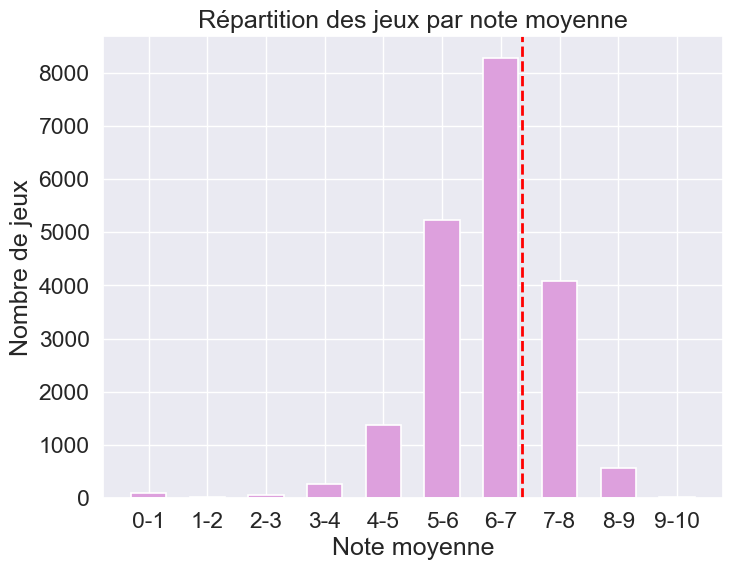

In [356]:
# Intervalles
intervals = [[i, i+1] for i in range(10)]

# Calcul du nombre de jeux par intervalle
amounts = []
for interval in intervals:
    i, j = interval
    games_in_interval = df[(df['average'] >= i) & (df['average'] < j)]
    amounts.append(len(games_in_interval))

# Calcul de la moyenne, m√©diane et de l'√©cart type
mean = df['average'].mean()
median = df['average'].median()
print(median)
std = df['average'].std()
print(f"Moyenne: {mean:.2f} - M√©diane: {median:.2f} - Ecart type: {std:.2f}")

# Cr√©ation de l'histogramme en barres
plt.figure(figsize=(8,6))
plt.title("R√©partition des jeux par note moyenne")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de jeux")

labels = [f"{i}-{i+1}" for i in range(10)]
plt.bar(labels, amounts, linewidth=1.2, width=0.6, color="plum")
plt.axvline(median, color='red', linestyle='dashed', linewidth=2)
plt.show()

On remarque qu'il y a peu de jeux qui ont √©t√© not√© en dessous de 5. Il ne sert donc √† **rien** de consid√©rer un jeu comme "bien not√©" s'il a une note sup√©rieure √† 5. 

Consid√©rons pour la suite que les jeux qui ont une note moyenne **sup√©rieure ou √©gale √† la m√©diane (6.35) sont des jeux "bien not√©s"**. Cela nous laisse 10 000 jeux √† √©tudier. Appelons les jeux bien not√©s `good_games`.



In [357]:
good_games = df[df['average'] > median]
print(median)
print(f"Nombre de jeux ayant une note moyenne sup√©rieure √† la m√©diane: {len(good_games)}")

6.35417
Nombre de jeux ayant une note moyenne sup√©rieure √† la m√©diane: 9997


Seconde chose √† prendre en compte: **le nombre de vote**. Si un jeu est tr√®s bien not√© mais qu'il n'y a que 5 votants, on pourrait consid√©rer que la note n'est pas pertinente. Commen√ßons par regarder la repartion du nombre de vote:

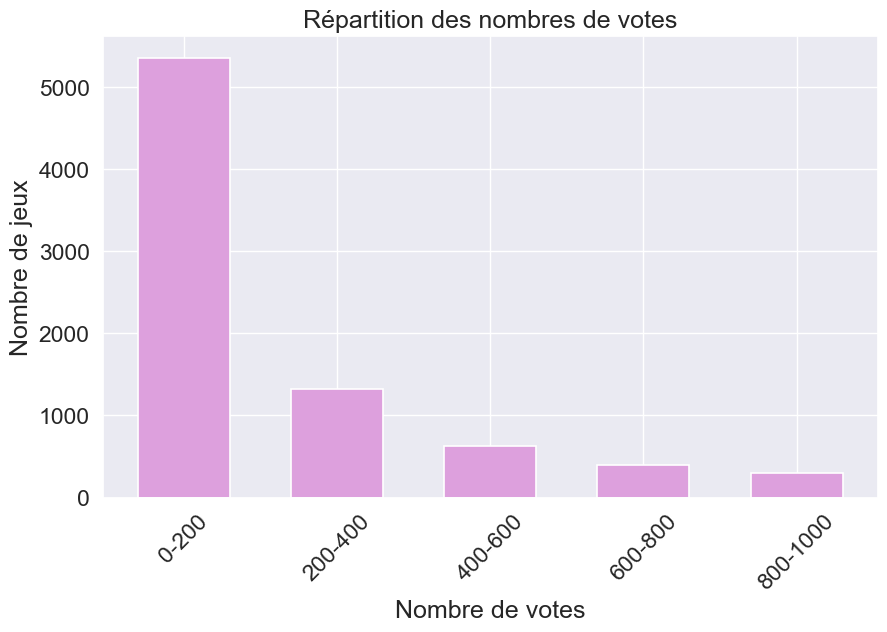

In [358]:
intervals = [[i, i+200] for i in range(0, 1000, 200)]

# Calcul du nombre de jeux par intervalle
amounts = []
for interval in intervals:
    i, j = interval
    games_in_interval = good_games[(good_games['usersrated'] >= i) & (good_games['usersrated'] < j)]
    amounts.append(len(games_in_interval))

# Cr√©ation de l'histogramme en barres
plt.figure(figsize=(10,6))
plt.title("R√©partition des nombres de votes")
plt.xlabel("Nombre de votes")
plt.xticks(rotation=45)
plt.ylabel("Nombre de jeux")

labels = [f"{i}-{i+200}" for i in range(0, 1000, 200)]
plt.bar(labels, amounts, linewidth=1.2, width=0.6, color='plum')

plt.show()

On cherche √† savoir **si la note moyenne est corr√©l√©e au nombre de vote**. On va utiliser l'√©cart type comme mesure de dispersion de notes en fonction de la note moyenne. On va donc regarder si la note moyenne est corr√©l√©e au nombre de vote gr√¢ce √† une nuage de points et une l√©gende de couleur. 

On s√©pare le nuage de points en deux parties: les jeux not√©s par moins de 1000 personnes et ceux not√©s pas plus de 1000 personnes. Cette s√©paration est pertinente car on a pu voir avec le graphique ci-dessus qu'il y avait de **moins en moins** de jeux lorsqu'ils sont not√©s par beaucoup de personnes.

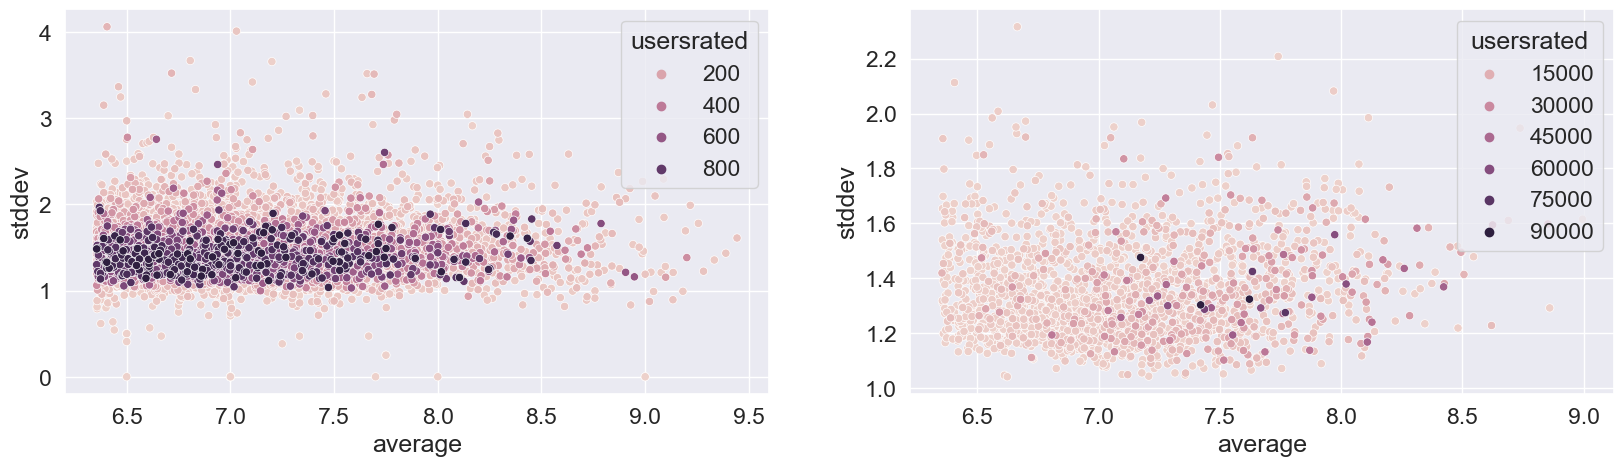

In [359]:
std_good_games1 = good_games[good_games['usersrated'] < 1000].sort_values(by='usersrated', ascending=True)
std_good_games2 = good_games[good_games['usersrated'] > 1000].sort_values(by='usersrated', ascending=True)

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x="average", y="stddev", data=std_good_games1, hue="usersrated", hue_norm=(0, 1000))
plt.subplot(1, 2, 2)
sns.scatterplot(x="average", y="stddev", data=std_good_games2, hue="usersrated")


plt.show()

On d√©coupe en deux l'analyse en faisant un graphe comportant les moyennes des jeux les moins not√©s et un autre graphe comportant les moyennes des jeux les plus not√©s.
Peu importe le nombre de votant (_montr√© par la couleur_) l'√©cart-type `stddev` **reste aux alentours de 1.5**. 

Conclusion de cette pr√©-analyse: Les deux graphes ci-dessus montrent que la note moyenne est **tr√®s peu corr√©l√©e au nombre de vote**. Cela signifie que peu importe le nombre de votant, la note moyenne est **tr√®s proche de la note moyenne de tous les jeux**. 

On peu donc **uniquement** consid√©rer que les meilleurs jeux sont les jeux qui font partie des 10 000 jeux les mieux not√©s.

D√©couvrons maintenant les caract√©ristiques des jeux biens not√©s:

* En quelle ann√©e sont sortis les meilleurs jeux de soci√©t√©?
* Quelle est la difficult√© moyenne des meilleurs jeux de soci√©t√©?
* Quelle est la m√©canique de jeu des meilleurs jeux de soci√©t√©?

##### <ins>**1-A)** En quelle **ann√©e** sont sortis les meilleurs jeux de soci√©t√©?</ins> üï∞Ô∏è

Tout d'abord, faisons une premi√®re analyse des donn√©es pour voir si les jeux bien not√©s sont r√©partis de mani√®re homog√®ne dans le temps. Comme explicit√© dans le pr√©traitement des donn√©es, la colonne `yearpublished` contient effectivement des valeurs aberrantes. Pour savoir √† partir de quelle date il est pertinent de consid√©rer les jeux, regardons de nouveau les statistiques descriptives de la colonne `yearpublished`: 

In [360]:
# Obtenir une liste des ann√©es pr√©sentes dans la dataframe good_games
years = pd.DataFrame(good_games['yearpublished'])
years.describe()

yearpublished
count    9997.000000
mean     1994.642793
std       166.841691
min     -3000.000000
25%      2004.000000
50%      2013.000000
75%      2017.000000
max      2021.000000

On peut √† pr√©sent se demander si les jeux bien not√©s sont r√©partis de mani√®re homog√®ne dans le temps. Pour cela, on va regarder la proportion de jeux bien not√©s par ann√©e:

Moyenne: 1994.64 - M√©diane: 2013.00 - Ecart type: 166.84


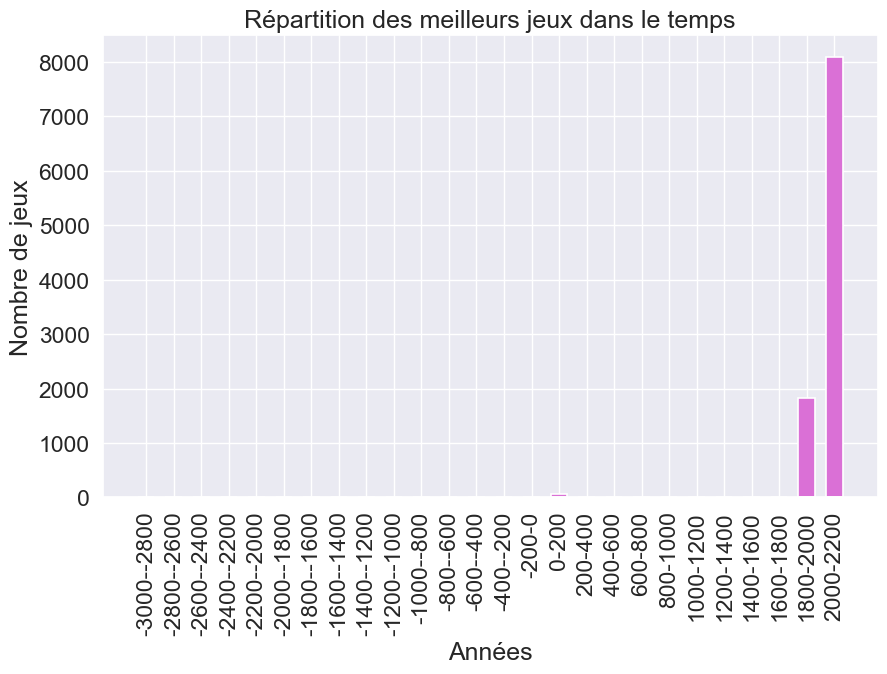

In [361]:
intervals = [[i, i+200] for i in range(-3000, 2021, 200)]

# Calcul du nombre de jeux par intervalle
amounts = []
for interval in intervals:
    i, j = interval
    games_in_interval = years[(years['yearpublished'] >= i) & (years['yearpublished'] < j)]
    amounts.append(len(games_in_interval))

# Calcul de la moyenne, m√©diane et de l'√©cart type
mean_years = years['yearpublished'].mean()
median_years = years['yearpublished'].median()
std_years = years['yearpublished'].std()
print(f"Moyenne: {mean_years:.2f} - M√©diane: {median_years:.2f} - Ecart type: {std_years:.2f}")

# Cr√©ation de l'histogramme en barres
plt.figure(figsize=(10,6))
plt.title("R√©partition des meilleurs jeux dans le temps")
plt.xlabel("Ann√©es")
plt.xticks(rotation=90)
plt.ylabel("Nombre de jeux")

labels = [f"{i}-{i+200}" for i in range(-3000, 2021, 200)]
plt.bar(labels, amounts, linewidth=1.2, width=0.6, color="orchid")
plt.show()


Un premier graphe montre que la proportion de jeux bien not√©s est essentiellement entre 1800 et 2021. En affinant les tranches d'ann√©es, on peut voir que la proportion de jeux bien not√©s est tr√®s faible avant 1950.

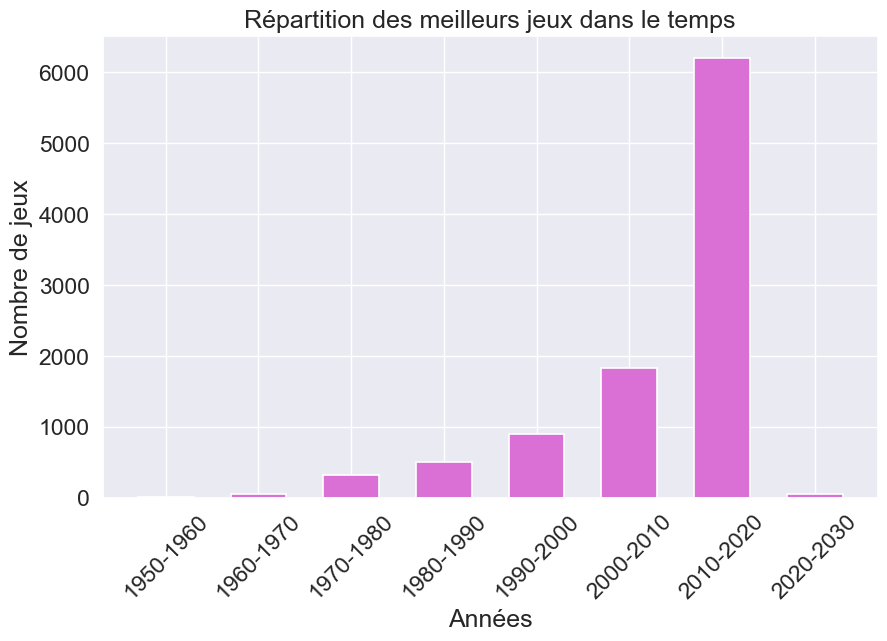

In [362]:
intervals = [[i, i+10] for i in range(1950, 2021, 10)]

# Calcul du nombre de jeux par intervalle
time_amounts = []
for interval in intervals:
    i, j = interval
    games_in_interval = years[(years['yearpublished'] >= i) & (years['yearpublished'] < j)]
    time_amounts.append(len(games_in_interval))

# Cr√©ation de l'histogramme en barres
plt.figure(figsize=(10,6))
plt.title("R√©partition des meilleurs jeux dans le temps")
plt.xlabel("Ann√©es")
plt.xticks(rotation=45)
plt.ylabel("Nombre de jeux")

time_labels = [f"{i}-{i+10}" for i in range(1950, 2021, 10)]
plt.bar(time_labels, time_amounts, linewidth=1.2, width=0.6, color="orchid")
plt.show()

Visiblement **les jeux bien not√©s sont majoritairement sortis apr√®s 1950**. On peut conjecturer que cela est d√ª √† la popularit√© grandissante du site BGG ces derni√®res ann√©es ou bien tout simplement √† la popularit√© grandissante des jeux de soci√©t√© notamment gr√¢ce √† des sites comme BGG.

> De plus, la r√©partition des meilleurs jeux dans le temps suit une **loi exponentielle**. On pourrait donc essayer de pr√©dire le nombre de jeux bien not√©s dans les ann√©es √† venir.

**Conclusion**: le jeu de donn√©es n'est pas fait pour √©tudier les jeux de soci√©t√© d'un point de vue temporel.

##### <ins>**1-B)** Quelle est la **m√©canique de jeu / cat√©gories** du jeu pr√©f√©r√©e?</ins> üß©

Commen√ßons par recenser les diff√©rentes m√©canique de jeu pr√©sentes dans les meilleurs jeux de soci√©t√©:

In [363]:
mech_cat_games = pd.DataFrame({'name': good_games['name'],
                               'boardgamemechanic': good_games['boardgamemechanic'],
                               'boardgamecategory': good_games['boardgamecategory'],
                               'average': good_games['average'],})

mech_cat_games.head()

name  \
sortindex                                                  
1                                             Gloomhaven   
2                              Pandemic Legacy  Season 1   
3                                      Terraforming Mars   
4          Through the Ages  A New Story of Civilization   
5                                      Brass  Birmingham   

                                           boardgamemechanic  \
sortindex                                                      
1          ['Campaign / Battle Card Driven', 'Cooperative...   
2          ['Action Points', 'Cooperative Game', 'Hand Ma...   
3          ['Card Drafting', 'End Game Bonuses', 'Hand Ma...   
4          ['Action Points', 'Auction/Bidding', 'Auction:...   
5          ['Hand Management', 'Income', 'Loans', 'Market...   

                                           boardgamecategory  average  
sortindex                                                              
1          ['Adventure', 'Exploration', 'Fantasy', 'Fight...  8.85292  
2                               ['Environmental', 'Medical']  8.62499  
3          ['Economic', 'Environmental', 'Industry / Manu...  8.42299  
4                  ['Card Game', 'Civilization', 'Economic']  8.49419  
5          ['Economic', 'Industry / Manufacturing', 'Tran...  8.62031

En utilisant la m√©thode `explode` de pandas, on peut facilement compter le nombre de fois o√π une m√©canique de jeu est pr√©sente dans les meilleurs jeux de soci√©t√©:

In [364]:
mechanics = mech_cat_games.explode('boardgamemechanic')['boardgamemechanic']

# Compter les occurrences de chaque m√©caniques
mechanics_counts = mechanics.value_counts()
mechanics_counts.head(10)


['Hexagon Grid']                                  500
['Dice Rolling', 'Hexagon Grid', 'Simulation']    193
['Dice Rolling', 'Hexagon Grid']                  151
['Hand Management']                               120
['Dice Rolling']                                  120
['Hexagon Grid', 'Simulation']                    104
['Tile Placement']                                 90
['Hand Management', 'Set Collection']              83
['Grid Movement']                                  66
['Cooperative Game']                               66
Name: boardgamemechanic, dtype: int64


<img src="IMAGES/hexagon-grid.jpg" width="300" align="right" />

Les principales m√©caniques de jeu les plus aim√©es sont les suivantes: 

* **Hexagon Grid** (jeu sur un plateau hexagonal)
* **Dice Rolling** (jeu avec des d√©s)
* **Hand Management** (jeu avec des cartes)
* **Simulation** (jeu de simulation)
* **Tile Placement** (jeu avec des tuiles)

> On peut consid√©rer que c'est repr√©sentatif des m√©caniques les plus pr√©sentes m√™me sans extraire chaque m√©canique individuellement. 


On peut faire la m√™me chose pour les cat√©gories de jeu:

In [365]:
categories = mech_cat_games.explode('boardgamecategory')['boardgamecategory']

# Compter les occurrences de chaque m√©caniques
categories_counts = categories.value_counts()
categories_counts.head(10)


['Wargame', 'World War II']          549
['Card Game']                        334
['Abstract Strategy']                289
['Napoleonic', 'Wargame']            167
['Card Game', 'Fantasy']             146
['American Civil War', 'Wargame']    108
['Dice']                              91
['Modern Warfare', 'Wargame']         87
['Fantasy']                           83
['Wargame', 'World War I']            79
Name: boardgamecategory, dtype: int64

<img src="./IMAGES/hex-wargame.png" align="right" width="300"/>

Les principales cat√©gories de jeu les plus aim√©es sont les suivantes:

* **Wargame** (jeu de guerre)
* **Card Game** (jeu de cartes)
* **Abstract Strategy** (jeu abstrait)
* **Fantasy** (jeu de fantasy)
* **Napoleonic** (jeu sur la p√©riode napol√©onienne)

> Comme pr√©c√©demment, on peut consid√©rer que c'est repr√©sentatif des cat√©gories les plus pr√©sentes m√™me sans extraire chaque cat√©gorie individuellement.

Les jeux sur un plateau hexagonal sont les plus aim√©s, ce qui co√Øncide avec le fait que les jeux de guerre soient les plus aim√©s puisque la majorit√©s des jeux de plateau de guerre se jouent sur un plateau hexagonal. En effet, pour des raisons de game design, les jeux de guerres sont souvent repr√©sent√©s sur de tel plateau car ils permettent aux joueurs de se d√©placer de mani√®re plus naturelle et donne souvent plus de libert√© au joueur. 

Sur [meeple mountain](https://www.meeplemountain.com/top-six/top-6-hex-and-counter-wargames/), on peut trouver des articles sur les jeux de guerre sur plateau hexagonal datant de 2020 qui montrent pourquoi les plateaux hexagonaux permettent des strat√©gies riches et vari√©es ingame.

On peut donc en conclure qu'il peut exister des **corr√©lations entre les cat√©gories de jeu et les m√©caniques des meilleurs jeux**.

<img src="./IMAGES/brainstorm.png" align="right" width="150">

##### <ins>**1-C)** Quelle est la **difficult√©** des meilleurs jeux de soci√©t√©?</ins> üß†

On peut √† pr√©sent se demander quelle est la difficult√© moyenne des meilleurs jeux de soci√©t√©. 

Pour cela, on va regarder la distribution de la colonne `avgweight`. On peut tracer un nuage de point des note moyenne en fonction de la difficult√©:

<AxesSubplot: xlabel='avgweight', ylabel='average'>

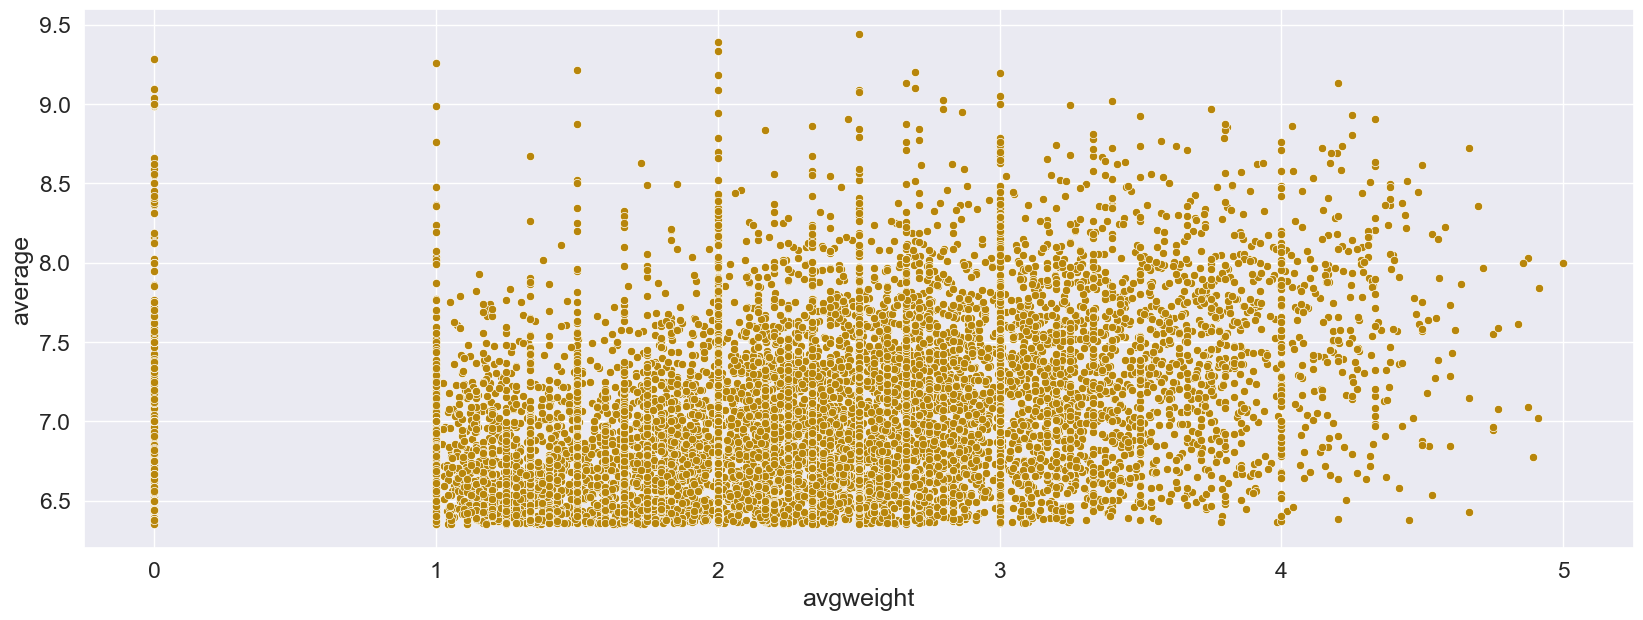

In [366]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=good_games, x='avgweight', y='average', color="darkgoldenrod")

_Remarques_:

* Pour les valeurs enti√®res de difficult√©, on remarques des sortes de colonnes de points. Cela est d√ª au fait que de mani√®re naturelle lorsqu'un internaute note un jeu il a tendance √† mettre une note ronde plut√¥t qu'une note d√©cimale. Par exemple, si un jeu est not√© 6.5, il est plus probable qu'il soit not√© 6 que 7.
* On remarque que globalement les points sont de plus en plus rare √† mesure que la difficult√© augmente. Cela est peut-√™tre d√ª au fait que les internautes ont tendance √† plus aimer les jeux simples.
* On peut voir un trou entre 0 et 1 de difficult√©. Apr√®s des recharches sur le site BGG, on peut trouver que la note `weight` est une note compris entre 1 et 5.

<img src="./IMAGES/weight.png" alt="Extrait du site BGG">

Dans ce cas, ***pourquoi il y a des jeux √† 0 de difficult√©***? Cr√©ons une nouvelle dataframe et √©tudions les caract√©ristique communes de ces jeux:

In [367]:
difficulty0 = good_games[good_games['avgweight'] == 0]
difficulty0.head()

name  yearpublished  \
sortindex                                                                
4323                            Monikers  More Monikers           2018   
5154              The Red Dragon Inn 7  The Tavern Crew           2018   
5695                                            KLASK 4           2019   
6322       Codex  Card-Time Strategy \u2013 Starter Set           2016   
6514                         Monikers  Serious Nonsense           2019   

           minplayers  maxplayers  minplaytime  maxplaytime  minage  \
sortindex                                                             
4323                4          20           60           60      18   
5154                2           4           30           60      13   
5695                4           4           10           10       8   
6322                2           2           45           45      13   
6514                4          20           60           60      18   

           usersrated  average   stddev  avgweight  numweights  numcomments  \
sortindex                                                                     
4323              108  8.31523  1.10406        0.0           0           38   
5154               99  8.16434  1.47135        0.0           0           24   
5695               94  7.52106  1.41630        0.0           0           18   
6322              102  6.99461  1.87742        0.0           0           30   
6514               51  8.50980  1.03607        0.0           0           12   

          boardgamehonor                                  boardgamecategory  \
sortindex                                                                     
4323            ['None']  ['Card Game', 'Humor', 'Mature / Adult', 'Part...   
5154            ['None']    ['Card Game', 'Fantasy', 'Humor', 'Party Game']   
5695            ['None']                             ['Action / Dexterity']   
6322            ['None']  ['Card Game', 'Fantasy', 'Fighting', 'Video Ga...   
6514            ['None']          ['Humor', 'Mature / Adult', 'Party Game']   

                                           boardgamemechanic  \
sortindex                                                      
4323             ['Acting', 'Card Drafting', 'Role Playing']   
5154       ['Betting and Bluffing', 'Hand Management', 'P...   
5695                                  ['Action / Dexterity']   
6322       ['Deck', 'Hand Management', 'Secret Unit Deplo...   
6514             ['Acting', 'Card Drafting', 'Role Playing']   

                                             boardgamefamily  
sortindex                                                     
4323                           ['Crowdfunding: Kickstarter']  
5154       ['Crowdfunding: Kickstarter', 'The Red Dragon ...  
5695                                               ['KLASK']  
6322                                      ['Fantasy Strike']  
6514       ['Admin: Unreleased Games', 'Crowdfunding: Kic...

On Remarque que cela est d√ª au fait que les jeux √† 0 de difficult√© n'ont tout simplement **pas √©t√© not√©.** On peut voir que d√®s que la colonne `avgweight` est √† 0, la colonne `numweights` l'est aussi. On peut v√©rifier cette conjecture en regardant la distribution de la colonne `numweights` lorsque l'on prend que les jeux qui ont une difficult√© de 0:

<AxesSubplot: xlabel='sortindex'>

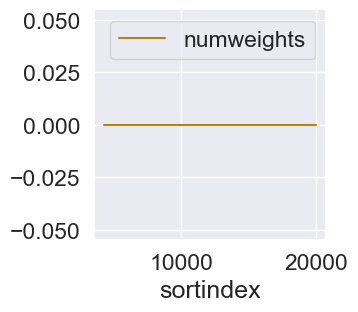

In [368]:
difficulty0.plot(y='numweights', figsize=(3,3), color="darkgoldenrod")

On peut donc supprimer ces jeux de notre dataframe et voici notre nouvelle distribution de la difficult√©:

M√©diane de la difficult√© des meilleurs jeux: 2.33
Moyenne de la difficult√© des meilleurs jeux: 2.37


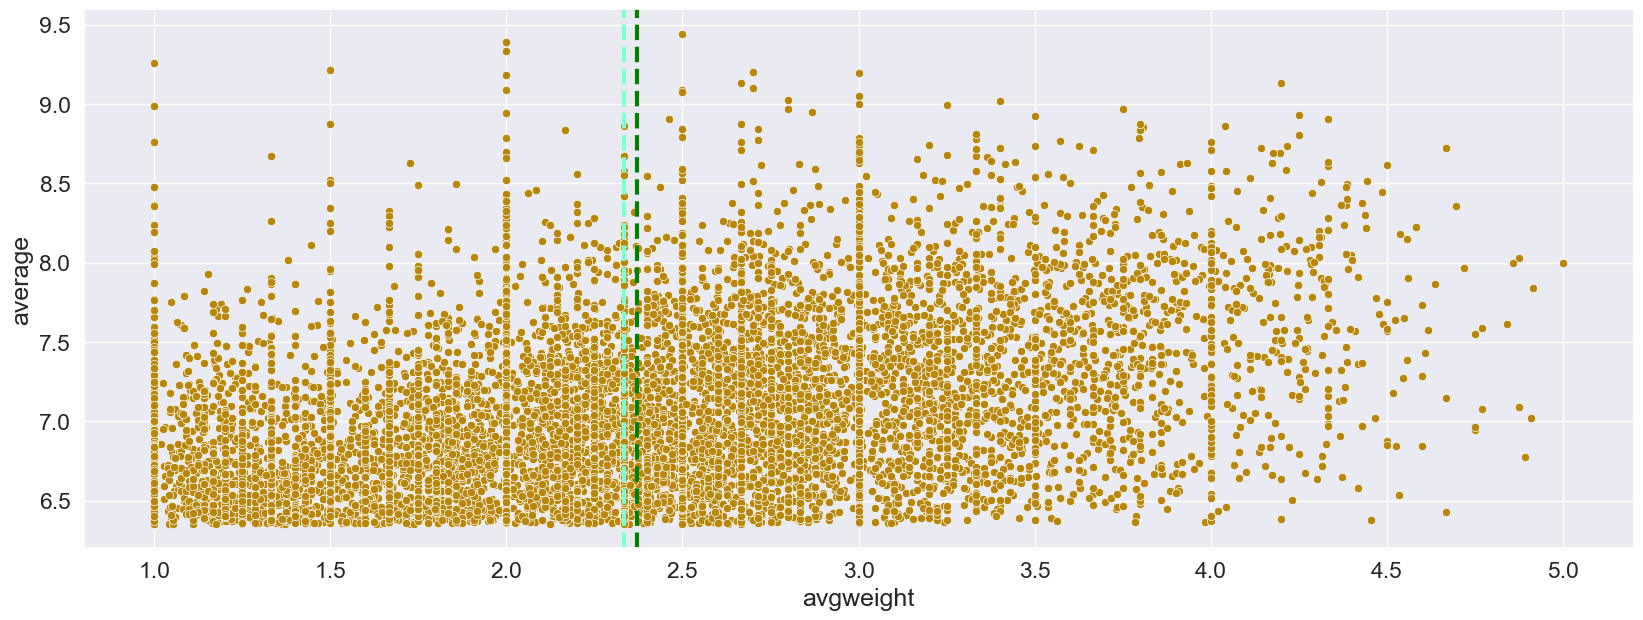

In [369]:
difficulty = good_games[good_games['avgweight'] > 0]
mean_difficulty = difficulty['avgweight'].mean()
median_difficulty = difficulty['avgweight'].median()

print(f"M√©diane de la difficult√© des meilleurs jeux: {median_difficulty:.2f}")
print(f"Moyenne de la difficult√© des meilleurs jeux: {mean_difficulty:.2f}")

plt.figure(figsize=(20,7))
sns.scatterplot(data=difficulty, x='avgweight', y='average', color="darkgoldenrod")
plt.axvline(mean_difficulty, color='green', linestyle='dashed', linewidth=3)
plt.axvline(median_difficulty, color='aquamarine', linestyle='dashed', linewidth=3)
plt.show()

On peut se demander quelle est la tendance des gens lorsqu'ils notent bien les jeux. Ce que je vais essayer de chercher √† voir c'est une √©ventuelle corr√©lation entre l'appr√©ciation d'un jeu et sa difficult√© chez les internautes du site BGG.

Regardons comment √©volue la difficult√© avec la note moyenne.

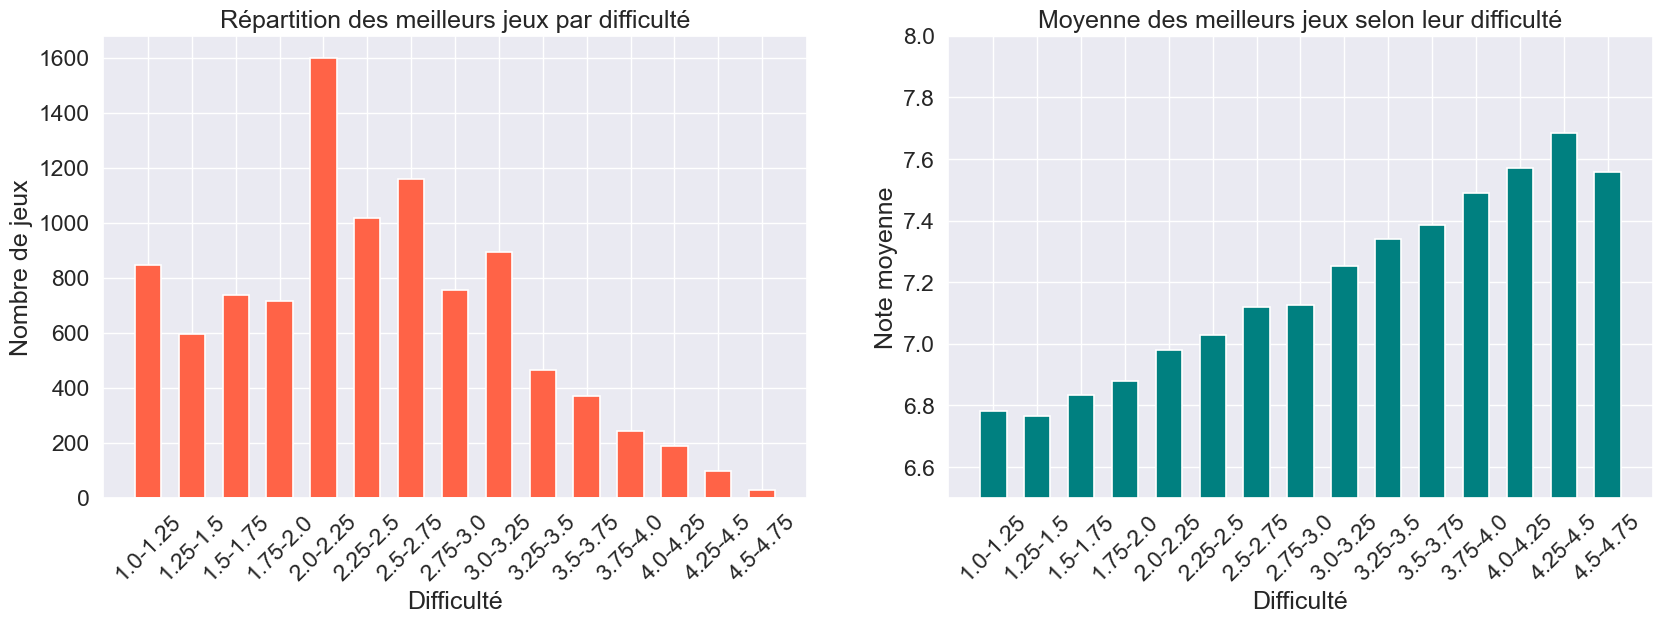

In [370]:
intervals = [[i, i+0.25] for i in np.arange(1, 4.75, 0.25)]

# Calcul du nombre de jeux par intervalle
amounts = []
average_ratings = []
for interval in intervals:
    i, j = interval
    games_in_interval = difficulty[(difficulty['avgweight'] >= i) & (difficulty['avgweight'] < j)]
    amounts.append(len(games_in_interval))
    average_ratings.append(games_in_interval['average'].mean())

# Cr√©ation de l'histogramme en barres
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title("R√©partition des meilleurs jeux par difficult√©")
plt.xlabel("Difficult√©")
plt.xticks(rotation=45)
plt.ylabel("Nombre de jeux")

labels = [f"{i}-{i+0.25}" for i in np.arange(1, 4.75, 0.25)]
plt.bar(labels, amounts, linewidth=1.2, width=0.6, color='tomato')

plt.subplot(1, 2, 2)
plt.bar(labels, average_ratings, linewidth=1.2, width=0.6, color='teal')
plt.title("Moyenne des meilleurs jeux selon leur difficult√©")
plt.xlabel("Difficult√©")
plt.xticks(rotation=45)
plt.ylabel("Note moyenne")
plt.ylim(6.5, 8)

plt.show()

Comme nous montre le graphique de droite, il y a une tendance √† noter plus haut les jeux plus dur, ce qui est **contre-intuitif**. On peut se demander si cette tendance est due au fait que les jeux plus dur sont plus rares et donc plus appr√©ci√©s. Cependant, la r√©partition des jeux selon la difficult√© montre qu'il y moins de jeux dur not√©s que de jeux simples not√©s. Cela veut donc dire qu'il est plus facile pour une note moyenne d'√™tre plus √©lev√©e pour un jeu dur que pour un jeu simple **s'il y a moins d'internautes qui ont not√© ce jeu**. 

Ce qui est int√©ressant dans ces graphiques, c'est qu'ils montrent que **l'on ne peut pas vraiment √©tablir la note moyenne d'un jeu en fonction de sa difficult√© tant qu'assez d'internautes n'ont pas not√© ce jeu.** Ce ph√©nom√®ne est visible dans les zones √† partir de 3 de difficult√©.

Cela veut donc dire que **la difficult√© d'un jeu n'est pas un bon indicateur de la note moyenne d'un jeu si nous consid√©rons uniquement les meilleurs jeux.** Qu'en est-il des autres jeux?

<img src="./IMAGES/negative.png" align="right" width="150"/>

---

### <ins>**2)** Comparaison avec les jeux de soci√©t√© les moins bien not√©s</ins>

Le but de cette partie est de comparer les jeux de soci√©t√© les moins bien not√©s avec les meilleurs jeux de soci√©t√©. On va donc mettre en √©vidences les caract√©ristiques communes et diff√©rences de ces deux sous-populations.

Commen√ßons tout d'abord par cr√©er une nouvelle dataframe contenant les jeux de soci√©t√© les moins bien not√©s, ainsi que les homologues des dataframe cr√©es pr√©c√©demment afin de pouvoir les comparer deux √† deux:

In [371]:
bad_games = df[df['average'] <= median]
bad_years = pd.DataFrame(bad_games['yearpublished'])
bad_mech_cat_games = pd.DataFrame({'name': bad_games['name'],
                               'boardgamemechanic': bad_games['boardgamemechanic'],
                               'boardgamecategory': bad_games['boardgamecategory'],
                               'average': bad_games['average'],})
bad_difficulty = bad_games[bad_games['avgweight'] > 0]

##### <ins>**2-A)** Analyse **temporelle**</ins> üï∞Ô∏è

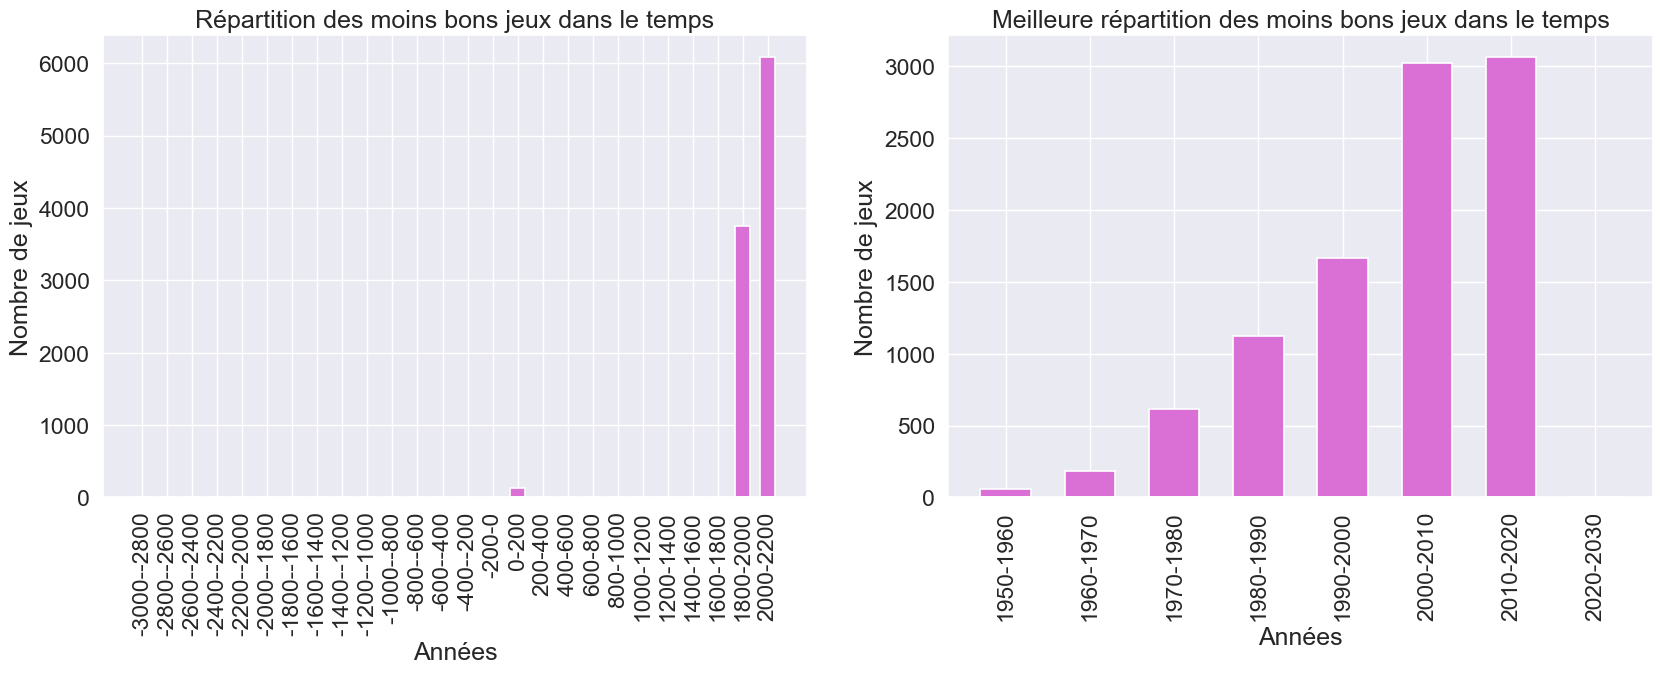

In [372]:
# Intervalles de 10 ans
intervals = [[i, i+200] for i in range(-3000, 2021, 200)]
better_intervals = [[i, i+10] for i in range(1950, 2021, 10)]

# Calcul du nombre de jeux par intervalle
amounts = []
for interval in intervals:
    i, j = interval
    games_in_interval = bad_years[(bad_years['yearpublished'] >= i) & (bad_years['yearpublished'] < j)]
    amounts.append(len(games_in_interval))
    
better_amounts = []
for interval in better_intervals:
    i, j = interval
    games_in_interval = bad_years[(bad_years['yearpublished'] >= i) & (bad_years['yearpublished'] < j)]
    better_amounts.append(len(games_in_interval))

# Cr√©ation de l'histogramme en barres
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title("R√©partition des moins bons jeux dans le temps")
plt.xlabel("Ann√©es")
plt.xticks(rotation=90)
plt.ylabel("Nombre de jeux")
labels = [f"{i}-{i+200}" for i in range(-3000, 2021, 200)]
plt.bar(labels, amounts, linewidth=1.2, width=0.6, color="orchid")

plt.subplot(1, 2, 2)
plt.title("Meilleure r√©partition des moins bons jeux dans le temps")
plt.xlabel("Ann√©es")
plt.xticks(rotation=90)
plt.ylabel("Nombre de jeux")
labels = [f"{i}-{i+10}" for i in range(1950, 2021, 10)]
plt.bar(labels, better_amounts, linewidth=1.2, width=0.6, color="orchid")


plt.show()

Passons rapidement l'analyse temporelle des jeux les moins biens not√©s: la r√©partition est la m√™me que celle des meilleurs jeux de soci√©t√© √† la diff√©rence pr√®s qu'il y a plus de moins bons jeux dans la p√©riode 2000-2010. La courbe exponentielle est **moins marqu√©e**.

On remarque √©galement sur le premier graphe qu'il y a  quelques jeux dans la p√©riode 0-200. Il s'agit des jeux anciens ainsi que **les erreurs de rentr√©es de donn√©es**. Certains jeux ont certainement d√ª √™tre rentr√©s sans dates de sortie: **le site a donc rentr√© la date 0 par d√©faut**.

##### <ins>**2-B)** Analyse des **m√©caniques / cat√©gories**</ins> üß©

In [373]:
bad_mechanics = bad_mech_cat_games.explode('boardgamemechanic')['boardgamemechanic']

# Compter les occurrences de chaque m√©caniques
bad_mechanics_counts = bad_mechanics.value_counts()
bad_mechanics_counts.head(10)


['Roll / Spin and Move']    489
['Hexagon Grid']            371
['Hand Management']         323
['Dice Rolling']            276
['Tile Placement']          225
['Set Collection']          201
['Memory']                  126
['Card Game']               125
['Pattern Recognition']     112
['Pattern Building']        102
Name: boardgamemechanic, dtype: int64

In [374]:
bad_categories = bad_mech_cat_games.explode('boardgamecategory')['boardgamecategory']

# Compter les occurrences de chaque m√©caniques
bad_categories_counts = bad_categories.value_counts()
bad_categories_counts.head(10)

['Card Game']                               604
['Abstract Strategy']                       384
['Wargame', 'World War II']                 198
['Dice']                                    140
['Party Game']                              117
['Economic']                                113
['Childrens Game']                           80
['Party Game', 'Trivia']                     77
['Action / Dexterity', 'Childrens Game']     77
['Science Fiction', 'Wargame']               71
Name: boardgamecategory, dtype: int64

De mani√®re g√©n√©rale, les jeux les moins bien not√©s sont **moins vari√©s** que les meilleurs jeux de soci√©t√©. On peut voir que les jeux les moins bien not√©s sont **plus concentr√©s** dans les m√™mes cat√©gories que les meilleurs jeux de soci√©t√©. Cependant, on remarque que les meilleurs jeux et moins bons jeux ont des cat√©gories communes comme "Card Game" ou "Hexagon Grid".

On peut noter aussi que les m√©caniques de jeu _Memory_, _Pattern Building_ et _Pattern Recognition_ sont les **plus pr√©sentes** dans les jeux les moins bien not√©s: **ces m√©caniques sont peu complexes √† mettre en place lors du gamedesign**. M√™me si la richesse des m√©caniques d'un jeu ne d√©finit pas enti√®rement sa qualit√©, il faut avouer que ces m√©caniques peuvent facilement √™tre utilis√©es pour **cr√©er facilement des jeux**. Au contraire, les m√©caniques _Abstract Strategy_ ou _Area Control / Area Influence_ (pr√©sentes dans les meilleurs jeux de soci√©t√©) **sont plus complexes inventer et impl√©menter** sur un jeu de plateau car elles requiert plus d'originalit√© dans le processus cr√©atif.

Cela peut expliquer pourquoi ces m√©caniques sont pr√©sentes dans les jeux les moins bien not√©s.

##### <ins>**2-C)** Analyse de la **difficult√©**</ins> üß†

M√©diane de la difficult√© des meilleurs jeux: 1.50
Moyenne de la difficult√© des meilleurs jeux: 1.67


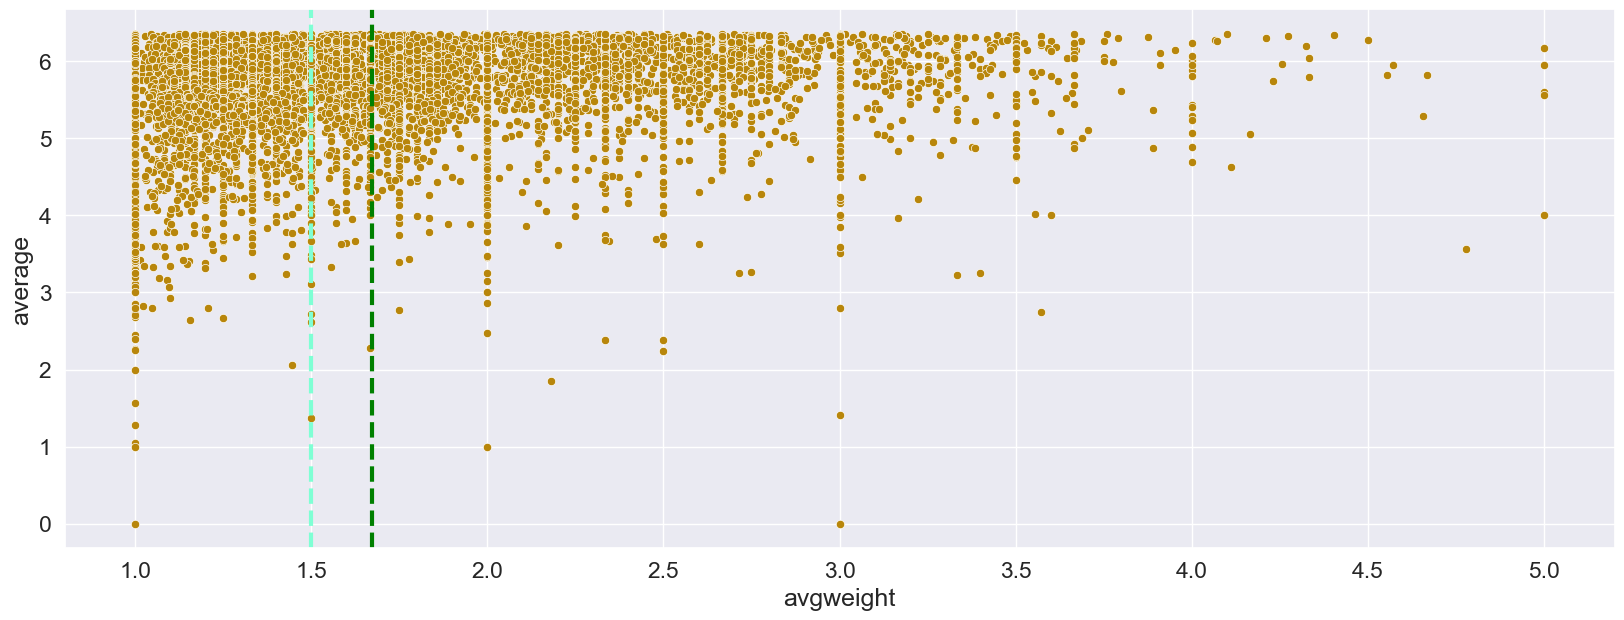

In [375]:
bad_mean_difficulty = bad_difficulty['avgweight'].mean()
bad_median_difficulty = bad_difficulty['avgweight'].median()

print(f"M√©diane de la difficult√© des meilleurs jeux: {bad_median_difficulty:.2f}")
print(f"Moyenne de la difficult√© des meilleurs jeux: {bad_mean_difficulty:.2f}")

plt.figure(figsize=(20,7))
sns.scatterplot(data=bad_difficulty, x='avgweight', y='average', color="darkgoldenrod")
plt.axvline(bad_mean_difficulty, color='green', linestyle='dashed', linewidth=3)
plt.axvline(bad_median_difficulty, color='aquamarine', linestyle='dashed', linewidth=3)
plt.show()

Cette fois ci, on remarque que chez les jeux les moins biens not√©s les jeux sont **plus concentr√©s** dans la difficult√© 1 et 2. Cela peut √™tre d√ª au fait que les jeux les moins bien not√©s sont **plus simples** que les meilleurs jeux de soci√©t√©. On peut voir que les jeux les moins bien not√©s sont **plus concentr√©s** dans les m√™mes cat√©gories que les meilleurs jeux de soci√©t√©. Quid de la relation entre la difficult√© et la note moyenne?

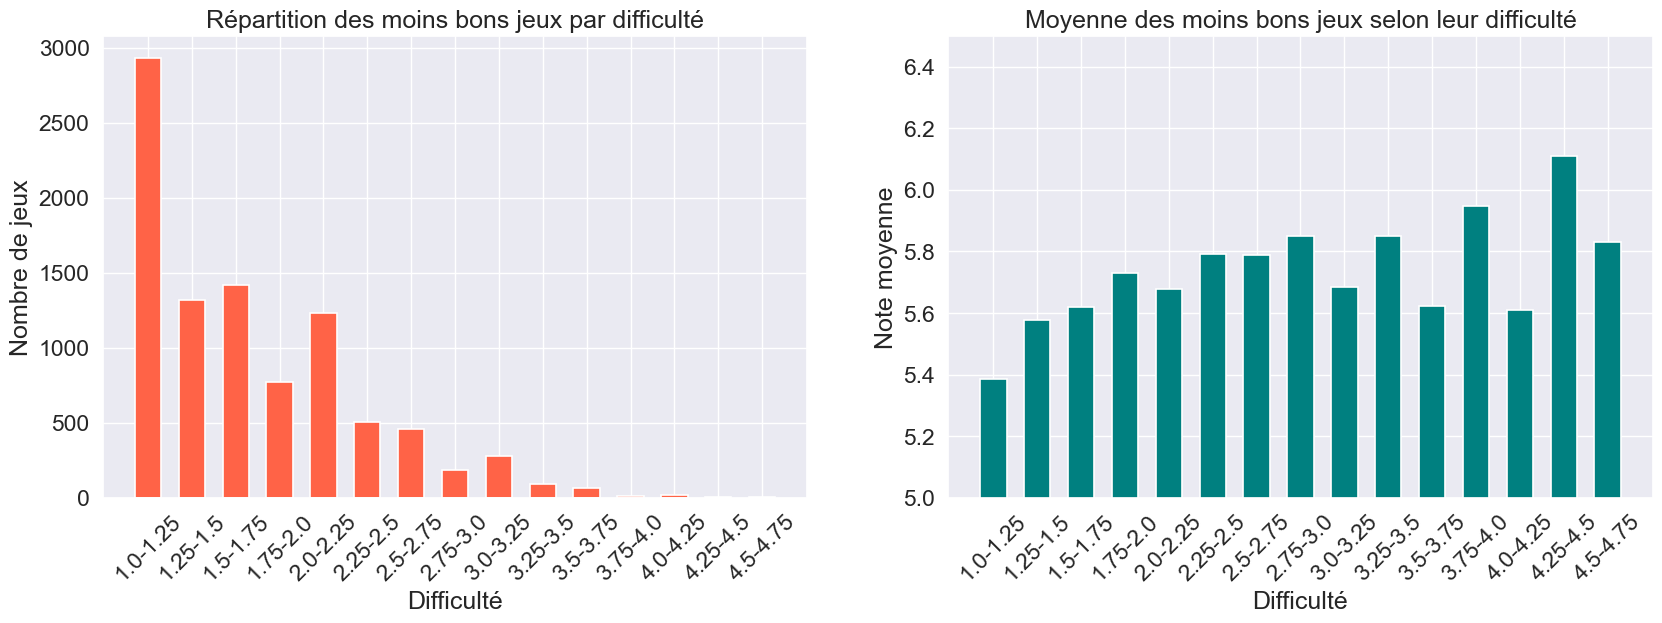

In [376]:
intervals = [[i, i+0.25] for i in np.arange(1, 4.75, 0.25)]

# Calcul du nombre de jeux par intervalle
bad_amounts = []
bad_average_ratings = []
for interval in intervals:
    i, j = interval
    games_in_interval = bad_difficulty[(bad_difficulty['avgweight'] >= i) & (bad_difficulty['avgweight'] < j)]
    bad_amounts.append(len(games_in_interval))
    bad_average_ratings.append(games_in_interval['average'].mean())

labels = [f"{i}-{i+0.25}" for i in np.arange(1, 4.75, 0.25)]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title("R√©partition des moins bons jeux par difficult√©")
plt.xlabel("Difficult√©")
plt.xticks(rotation=45)
plt.ylabel("Nombre de jeux")

plt.bar(labels, bad_amounts, linewidth=1.2, width=0.6, color='tomato')

plt.subplot(1, 2, 2)
plt.bar(labels, bad_average_ratings, linewidth=1.2, width=0.6, color='teal')
plt.title("Moyenne des moins bons jeux selon leur difficult√©")
plt.xlabel("Difficult√©")
plt.xticks(rotation=45)
plt.ylabel("Note moyenne")
plt.ylim(5, 6.5)

plt.show()

Contrairement aux meilleurs jeux de soci√©t√©, la r√©partition des jeux dans les niveaux de difficult√© est **plus concentr√©e dans les difficult√©s basses**. Cela veut donc dire, que comme pr√©c√©demment, on ne pourra vraiment √©tablir la note moyenne d'un jeu en fonction de sa difficult√© dans les difficult√©s basses. 

Cette fois ci, pour les difficult√©s en dessous de 2.0-2.25 les notes moyennes sont **plus basses** que pour les meilleurs jeux mais ce n'est pas non plus tr√®s d√©marqu√©. On comprend bien que les internautes de BGG pr√©f√®rent les jeux un peu plus difficiles. 

Cette difficult√© que nous avons √† pouvoir pr√©tendre que les notes moyennes que nous pouvons lire sur le graphe de droite sont pertinentes est li√© au fait que plus les jeux deviennent durs, moins de gens les ont not√©. Seulement, nous avons coup√© en deux nous jeu de donn√©es au d√©part et il est normal que les moins bons jeux ait moins de jeu avec une difficult√© de 3 assez not√©s.

##### <ins>**2-C bis)** Analyse de la difficult√© sur tous les jeux</ins>

M√©diane de la difficult√© des meilleurs jeux: 1.50
Moyenne de la difficult√© des meilleurs jeux: 1.67


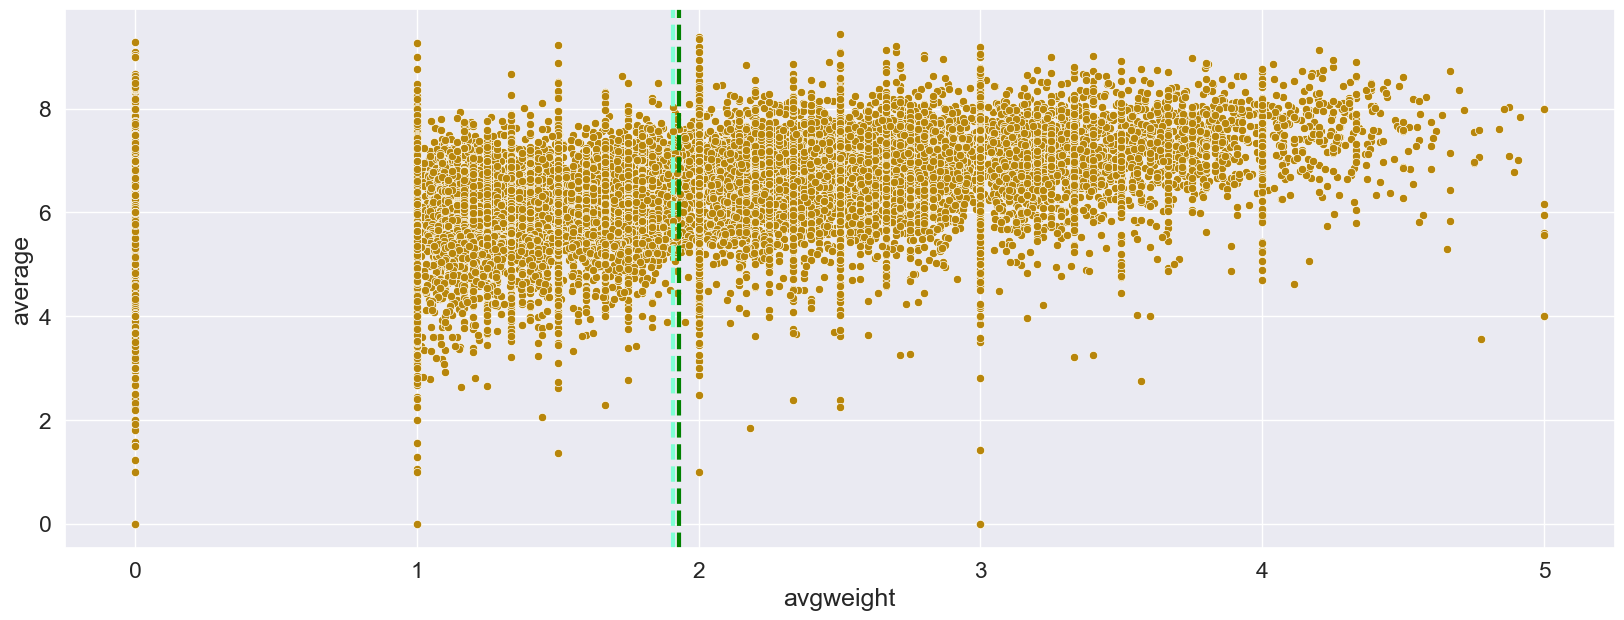

In [377]:
total_mean_difficulty = df['avgweight'].mean()
total_median_difficulty = df['avgweight'].median()

print(f"M√©diane de la difficult√© des meilleurs jeux: {bad_median_difficulty:.2f}")
print(f"Moyenne de la difficult√© des meilleurs jeux: {bad_mean_difficulty:.2f}")

plt.figure(figsize=(20,7))
sns.scatterplot(data=df, x='avgweight', y='average', color="darkgoldenrod")
plt.axvline(total_mean_difficulty, color='green', linestyle='dashed', linewidth=3)
plt.axvline(total_median_difficulty, color='aquamarine', linestyle='dashed', linewidth=3)
plt.show()

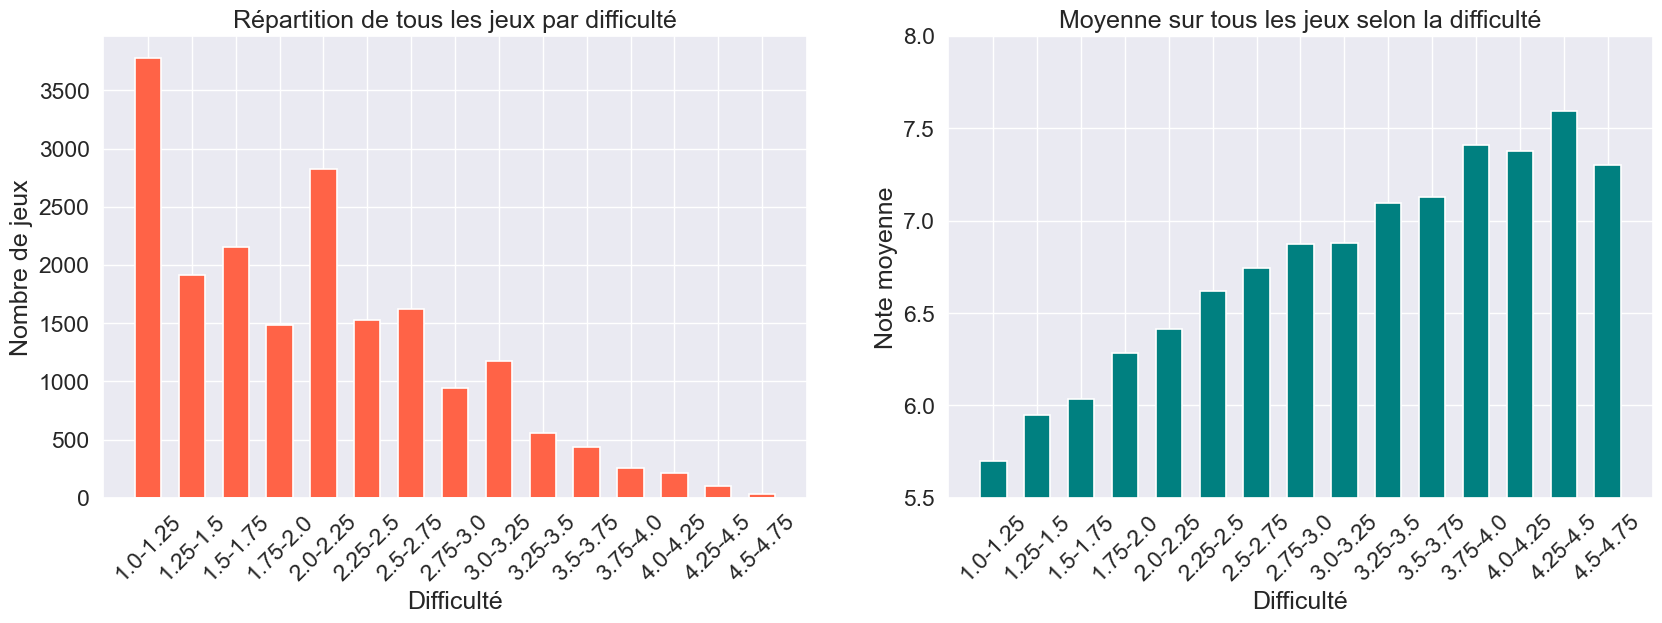

In [378]:
intervals = [[i, i+0.25] for i in np.arange(1, 4.75, 0.25)]

# Calcul du nombre de jeux par intervalle
total_amounts = []
total_average_ratings = []
for interval in intervals:
    i, j = interval
    games_in_interval = df[(df['avgweight'] >= i) & (df['avgweight'] < j)]
    total_amounts.append(len(games_in_interval))
    total_average_ratings.append(games_in_interval['average'].mean())

labels = [f"{i}-{i+0.25}" for i in np.arange(1, 4.75, 0.25)]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title("R√©partition de tous les jeux par difficult√©")
plt.xlabel("Difficult√©")
plt.xticks(rotation=45)
plt.ylabel("Nombre de jeux")

plt.bar(labels, total_amounts, linewidth=1.2, width=0.6, color='tomato')

plt.subplot(1, 2, 2)
plt.bar(labels, total_average_ratings, linewidth=1.2, width=0.6, color='teal')
plt.title("Moyenne sur tous les jeux selon la difficult√©")
plt.xlabel("Difficult√©")
plt.xticks(rotation=45)
plt.ylabel("Note moyenne")
plt.ylim(5.5, 8)

plt.show()

Il s'agit donc ici d'une combinaison des deux analyses pr√©c√©dentes. Nous avons toujours le probl√®me de manque de donn√©es pour les difficult√©s hautes mais nous pouvons maintenant comparer les jeux les moins bien not√©s avec les meilleurs jeux de soci√©t√© pour des difficult√© entre 2 et 3.

Pourquoi avons nous besoin de passer sur le jeu de donn√©es entier pour faire analyse? Comme nous l'avons vu, lorsque nous avons fait l'analyse de la difficult√© sur les meilleurs jeux de soci√©t√©, nous avons remarqu√© que la difficult√© n'√©tait pas un bon indicateur de la note moyenne d'un jeu en dehors de la plage de difficult√© 2-3. Cependant, nous avons remarqu√© que la difficult√© √©tait un bon indicateur de la note moyenne d'un moins bon jeu pour les difficult√©s basses mais d√®s que l'on approchait de 3, ce n'√©tait plus un bon indicateur.

Cela est d√ª au fait que nous coupons en deux nos jeux de donn√©es au d√©part. Cette fracture sectionne la tendance g√©n√©rale des points √† augmenter.

##### <ins>**2-D)** **Allure g√©n√©rale** de la difficult√© selon la note moyenne</ins>

Faisons une regression lin√©aire sur le nuage de point repr√©sentant la note moyenne en fonction de la difficult√©.

Estimation : a = 0.6 et b = 5.1
Corr√©lation entre la difficult√© et la note moyenne : 0.51


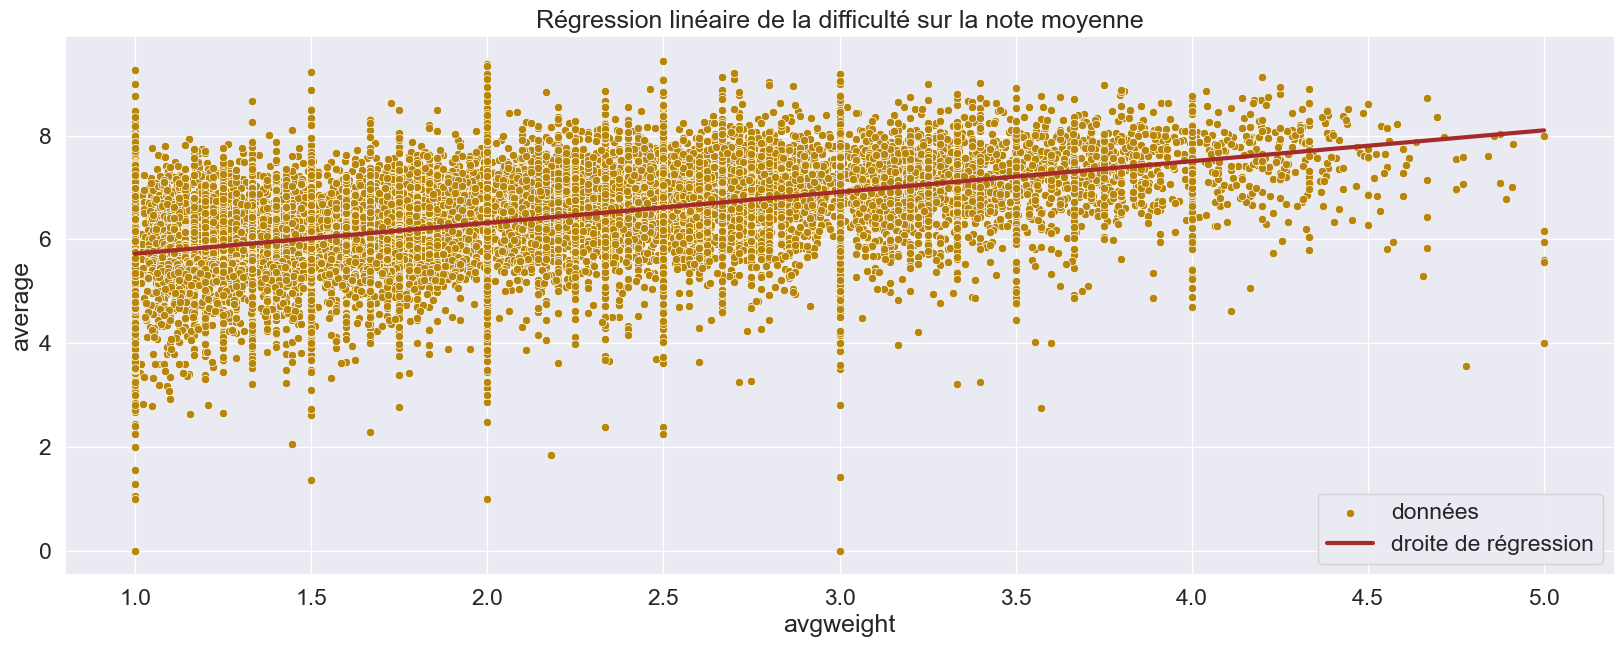

In [379]:
linear_regressor = LinearRegression(copy_X=True, fit_intercept=True)

df0 = df[df['avgweight'] != 0] # on supprime les jeux avec une difficult√© de 0 du jeu de donn√©es intial
df = pd.DataFrame(df0, columns=['avgweight', 'average'])
df2 = (df0 - df0.mean(axis = 0))/df.std(axis = 0)
X = df['avgweight'].to_numpy()
X = X.reshape(-1, 1) # √©tape n√©cessaire pour la mise en forme des donn√©es attendue par LinearRegression
Y = df['average'].to_numpy()
Y = Y.reshape(-1, 1)

result = linear_regressor.fit(X, Y)
print("Estimation : a = %.1f" %result.coef_[0] + " et b = %.1f" %result.intercept_)
print(f"Corr√©lation entre la difficult√© et la note moyenne : {df['avgweight'].corr(df['average']):.2f}")

plt.figure(figsize=(20,7))
plt.title("R√©gression lin√©aire de la difficult√© sur la note moyenne")
sns.scatterplot(x="avgweight", y='average',legend="full", data=df, color="darkgoldenrod")
plt.plot([np.min(X), np.max(X)], [result.intercept_ + np.min(X)*result.coef_[0], result.intercept_ + np.max(X)*result.coef_[0]], 'brown', linewidth=3)
plt.legend([ 'donn√©es' ,'droite de r√©gression'])
plt.show()

Nous avons √† pr√©sent une repr√©sentation graphique de la tendance qu'il existe entre la difficult√© et la note moyenne des jeux de soci√©t√©. On calcule √©galement le coefficient de corr√©lation, qui est de 0.51, ce qui n'est pas tr√®s pr√©cis. De plus, le coefficient directeur de la droite de r√©gression est de 0.6. On peut remarquer une tendance g√©n√©rale mais elle n'est pas tr√®s marqu√©e. 

> On pourrait justement se demander √† partir de quelle valeur de a la droite de r√©gression la tendance √† moins bien noter les jeux faciles devient significative.

Lorsque nous coupions notre jeu de donn√©es en deux, nous perdions une partie de la tendance g√©n√©rale: **la courbe rouge √©tait coup√©e en deux**. C'est pourquoi il √©tait dur pour nous de pr√©tendre que la difficult√© √©tait un bon indicateur de la note moyenne d'un jeu.

La note moyenne des jeux n'est pas la seule caract√©ristique qui peut suivre une tendance. En effet, ous avons pu voir lors de l'analyse temporelle de la sous-population des meilleurs jeux (**1-A)**) que la r√©partition des meilleurs jeux dans le temps √©tait exponentielle. Peut-√™tre pourrions nous utiliser un mod√®le de pr√©diction pour pr√©dire combien de jeux de soci√©t√© sortiront dans les ann√©es qui suivent.

<img src="./IMAGES/regression.png" align="right" width="150">

### <ins>**3)** Mod√®le de **pr√©diction**</ins>

Reprenons tout d'abord les donn√©es de la partie **1-A)**. 

On va chercher √† **pr√©dire le nombre de jeux de soci√©t√© qui sortiront dans les ann√©es √† venir**. Pour cela, nous allons utiliser un mod√®le de **r√©gression exponentielle**. Nous allons utiliser la fonction **``curve_fit``** de ``scipy.optimize`` pour trouver les coefficients de la courbe de r√©gression.

Nous devons √©galement penser √† **ne pas prendre en compte la valeur de la d√©cennie 2020-2030**. En effet, nous n'avons pas encore assez de donn√©es pour cette d√©cennie.

Nous allons ensuite calculer les valeurs du prochains point th√©orique selon le mod√®le de r√©gression.

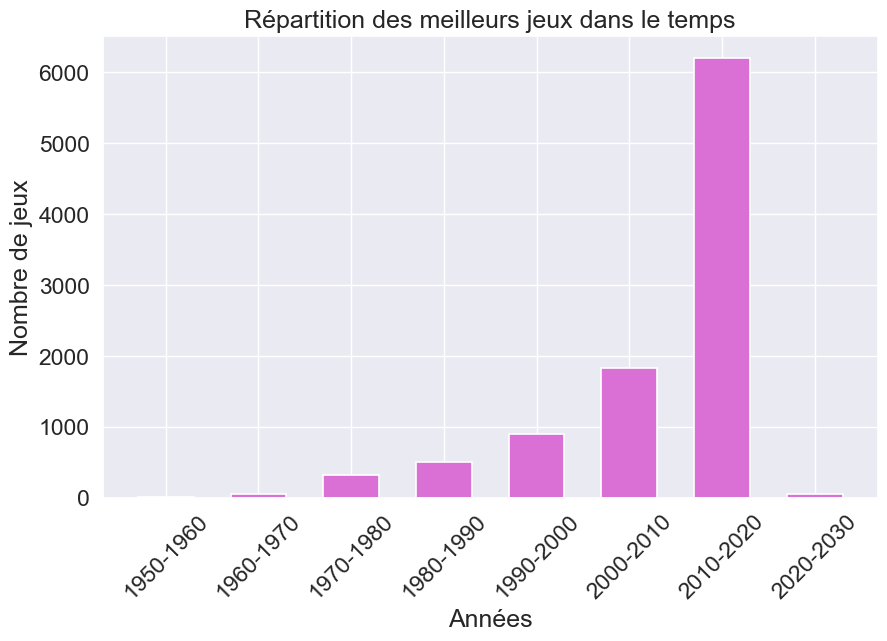

In [380]:
plt.figure(figsize=(10,6))
plt.title("R√©partition des meilleurs jeux dans le temps")
plt.xlabel("Ann√©es")
plt.xticks(rotation=45)
plt.ylabel("Nombre de jeux")

plt.bar(time_labels, time_amounts, linewidth=1.2, width=0.6, color="orchid")
plt.show()

On peut se demander si le mod√®le de r√©gression exponentielle est le meilleur mod√®le pour pr√©dire le nombre de jeux de soci√©t√© qui sortiront dans les ann√©es √† venir. 

Pour cela, deux approches:

* Calculer **l'erreur quadratique moyenne** entre  les diff√©rents mod√®les de regressions
* Calculer **la diff√©rence de r√©sultat** entre les valeurs pr√©dites et les valeurs r√©elles sur la d√©cennie 2010-2020 lorsque l'on ne prend pas en compte cette derni√®re dans les diff√©rents mod√®les de r√©gression.


Pr√©diction pour la prochaine d√©cennie : 20239.66657320063
Pr√©diction pour la prochaine d√©cennie (r√©gression polynomiale) : 8280.57142857144


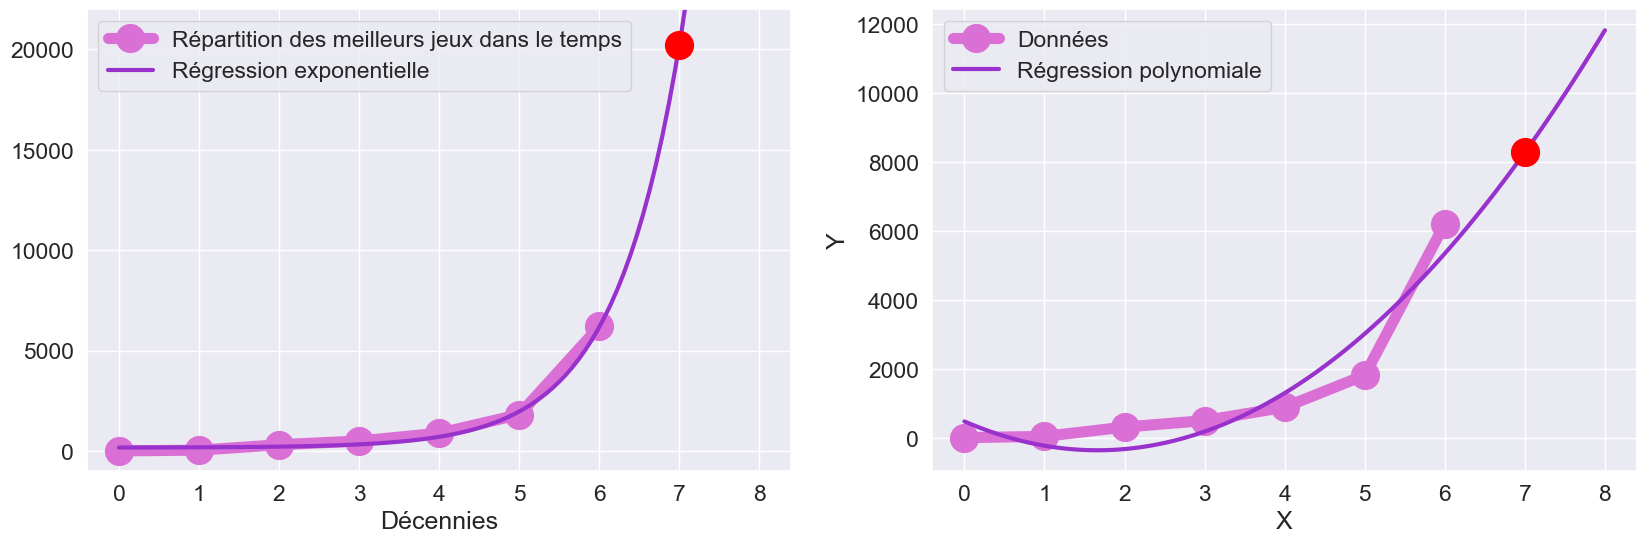

In [416]:
x_data = [i for i in range(7)]
y_data = time_amounts[:7]

def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

exp_popt, exp_pcov = curve_fit(exponential_func, x_data, y_data)

# Trac√© de la courbe exponentielle ajust√©e sur vos donn√©es
exp_x_fit = np.linspace(0, 8, 100)
exp_y_fit = exponential_func(exp_x_fit, *exp_popt)

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)

plt.plot(x_data, y_data, label='R√©partition des meilleurs jeux dans le temps', color='orchid', marker='o',markersize=20, linewidth=8)
plt.plot(exp_x_fit, exp_y_fit, label='R√©gression exponentielle', color='darkorchid', linewidth=3)
plt.legend()
plt.ylim(-1000, 22000)
plt.xlabel("D√©cennies")

# Pr√©diction du nombre de jeux sortis dans la prochaine d√©cennie
n_years = 7
x_pred = np.linspace(0, n_years, n_years+1)
exp_y_pred = exponential_func(x_pred, *exp_popt)
print("Pr√©diction pour la prochaine d√©cennie :", exp_y_pred[-1])
plt.plot(7, exp_y_pred[-1], marker='o', markersize=20, color='red', linewidth=2)

plt.subplot(1, 2, 2)
coeffs = np.polyfit(x_data, y_data, deg=2)
poly_x_fit = np.linspace(0, 8, 100)
poly_y_fit = np.polyval(coeffs, poly_x_fit)


poly_func = np.poly1d(coeffs)
poly_y_pred = poly_func(x_pred)

# Affichage de la pr√©diction pour la r√©gression polynomiale
print("Pr√©diction pour la prochaine d√©cennie (r√©gression polynomiale) :", poly_y_pred[-1])

plt.plot(x_data, y_data, label='Donn√©es', color='orchid', marker='o',markersize=20, linewidth=8)
plt.plot(poly_x_fit, poly_y_fit, label='R√©gression polynomiale', color='darkorchid', linewidth=3)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(7, poly_y_pred[-1], marker='o', markersize=20, color='red', linewidth=2)
plt.show()


In [418]:
poly_mse = 1/len(y_data) * np.sum((y_data[:6] - poly_y_pred[:6])**2)
exp_mse = 1/len(y_data) * np.sum((y_data[:6] - exp_y_pred[:6])**2)

print(f"MSE de la r√©gression polynomiale: {poly_mse:.2f}")
print(f"MSE de la r√©gression exponentielle: {exp_mse:.2f}")

print(f"Am√©lioration de la r√©gression exponentielle par rapport √† la r√©gression polynomiale: {100*(poly_mse - exp_mse)/poly_mse:.2f}%")

MSE de la r√©gression polynomiale: 344685.31
MSE de la r√©gression exponentielle: 20147.83
Am√©lioration de la r√©gression exponentielle par rapport √† la r√©gression polynomiale: 94.15%


Apr√®s avoir calcul√© l'erreur quadratique moyenne, on remarque que le mod√®le de r√©gression exponentielle est le meilleur mod√®le pour pr√©dire le nombre de jeux de soci√©t√© qui sortiront dans les ann√©es √† venir. On a un mod√®le qui est **94% plus pr√©cis** que le mod√®le de r√©gression lin√©aire.

Il n'y a donc aucun doute et m√™me pas besoin de calculer les erreurs de pr√©diction pour la d√©cennie 2010-2020, on peut m√™me se convaincre graphiquement que le mod√®le polynomial est moins pr√©cis.

On obtient donc gr√¢ce au mod√®le de pr√©diction une valeur de 20 239 jeux qui sortiront sur la d√©cennie 2020-2030. 

In [422]:
augmentation = (exp_y_pred[-1] - exp_y_pred[-2])/exp_y_pred[-2]
valeur_augm = exp_y_pred[-1] - exp_y_pred[-2]
print(f"Augmentation du nombre de jeux sortis dans la prochaine d√©cennie: {100*augmentation:.2f}%")
print(f"Valeur de l'augmentation du nombre de jeux sortis dans la prochaine d√©cennie: {valeur_augm:.2f}")

Augmentation du nombre de jeux sortis dans la prochaine d√©cennie: 227.30%
Valeur de l'augmentation du nombre de jeux sortis dans la prochaine d√©cennie: 14055.93


Cela repr√©sente une augmentation de 14 000 jeux par rapport √† la d√©cennie 2010-2020. 

> *De quoi s'amuser pendant un moment!*

On peut **se demander si cette augmenation est r√©alisable**. Le probl√®me est que nous n'avons pas assez de donn√©es sur d'assez longues p√©riode pour pouvoir faire une analyse plus pouss√©e du mod√®le de pr√©diction √† choisir.  Au final un mod√®le de regression qui fait un compromis entre la r√©gression exponentielle et polynomiale serait le mod√®le le plus optimal et plus repr√©sentatif du comportement humain. 

##### <ins>*Quoi qu'il en soit, seul l'avenir nous le dira!*</ins> üöÄ

---
---

<img src="./IMAGES/clipboard.png" align="right" width="150"/>

## <ins>**IV Conclusions du projet ISSD**</ins>

Dans le cadre de ce projet nous avons pu √©tudier les caract√©ristiques communes des jeux de soci√©t√© en fonction de leur note moyenne aupr√®s des internautes de [Board Game Geek](https://boardgamegeek.com/). Les observations sont les suivantes:

* Les jeux de soci√©t√© not√©s sur le site BGG sont **essentiellement des jeux r√©cents**. Peu importe leur note moyenne, la plupart des jeux de soci√©t√© sont sortis apr√®s 1950 et suivent **une tendance exponentielle**. C'est √† dire que plus les ann√©es passent et plus il y a de jeux de soci√©t√© not√©s sur le site BGG. On a par la m√™me occasion pu faire une pr√©diction sur le nombre de bons jeux de soci√©t√© qui allait sortir l'ann√©e prochaine.

* Les m√©caniques et cat√©gories de jeux pr√©f√©r√©es sont en g√©n√©rale des m√©canique **complexes** et des cat√©gories de jeux plus **originales** que ceux des jeux les moins populaires. On a pu trouver des corr√©lations entre m√©caniques et cat√©gories, notamment avec le fait que les jeux de guerre sont plus int√©ressants d'un point de vue strat√©gique lorsqu'ils sont jou√©s sur des plateaux hexagonaux, ou bien le fait que les jeux de cartes sont en g√©n√©ral plus limit√©s en terme de possibilit√©s et donc moins palpitants.

* Il existe une tendance g√©n√©rale √† **noter les jeux de soci√©t√© plus difficiles plus haut**. Cependant, cette tendance n'est pas significative. En effet, lorsque nous avons coup√© notre jeu de donn√©es en deux, nous avons perdu une partie de la tendance g√©n√©rale. C'est pourquoi il √©tait dur pour nous de pr√©tendre que la difficult√© √©tait un bon indicateur de la note moyenne d'un jeu. Cependant, m√™me en faisant l'analyse sur la totalit√© du jeu de donn√©es on se rend compte qu'il n'y a pas vraiment de corr√©lation directe entre la difficult√© et la note moyenne.

<img src="./IMAGES/brain.png" align="right" width="100">

### <ins>***Pour aller plus loin***</ins>

On s'est rendu compte que la difficult√© n'√©tait pas un bon indicateur de la note moyenne d'un jeu. Cependant, **d'autres caract√©ristiques inexploit√©es dans ce projet pourrait servir** √† d√©finir une √©chelle de difficult√©: le temps maximum et minimum de jeu, le nombre de joueurs minimum et maximum...

Une mani√®re de d√©finir la complexit√© gr√¢ce aux autres caract√©ristiques des jeux de soci√©t√© serait de **construire un mod√®le de machine learning** pour pr√©dire la difficult√© d'un jeu de soci√©t√© donn√© en fonction de ses caract√©ristiques gr√¢ce √† la biblioth√®que [scikit-learn](https://scikit-learn.org/stable/). Cette biblioth√®que permet de construire des mod√®les de machine learning de mani√®re tr√®s simple et rapide. Lors de son apprentissage, **le mod√®le de ML classifiera les jeux de soci√©t√© en groupe de difficult√©**; groupes d√©finis par la relation **difficult√© <-> `min/maxplayers`&`min/maxplaytime`**; et pourra ainsi pr√©dire la difficult√© d'un jeu de soci√©t√© en fonction de ses caract√©ristiques.

---

#### *Remarques personnelles:*

* J'ai remarqu√© que **j'aurai d√ª consacr√© plus de temps au travail** de pr√©traitement car je me suis rendu compte √† plusieurs de moments qu'il y a avait des probl√®mes √† cause de valeurs incoh√©rentes dans certaines colonnes. Je me suis rendu compte tard que cela provenait du fait que sil ny avait pas de valeurs manquantes cetait parce que par d√©faut si le site n'a aucune valeur de rentr√©e il prend la valeur 0. Mais j'imagine que cela fait aussi parti du processus de se rendre compte en plein travail qu'il y a des soucis.
* J'ai appris qu'il fallait faire attention √† **comment on modifiait son jeu de donn√©es** au fur et a mesure que le notebook jupyter avance. Parfois on se retrouve avec des r√©sultats incoh√©rents et qui nous font parfois penser que nous nous sommes tromp√©s alors qu'en r√©alit√© le jeu de donn√©es a √©t√© modifi√© quelques lignes plus haut √† cause d'un effet de bord.
* A plein d'instant j'ai d√ª restreindre ma mani√®re d'aborder les probl√®mes parce que **je n'avais pas assez d'exp√©rience avec les biblioth√®ques *[pandas](https://pandas.pydata.org/docs/)* en *[seaborn](https://seaborn.pydata.org/)***. M√™me avec l'aide de la documentation officielle des librairies et de *[Chat GPT](https://openai.com/blog/chatgpt)* je ne savais pas bien quelle repr√©sentation utiliser et comment faire en sorte que ces repr√©sentations r√©pondent de mani√®re efficace √† mes questions.